<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Kaggle Challenges with Titanic Survival (Classification)



### Group 5:

- Raghad Alharbi
- Fatimah Aljohani
- Hessah Hamed Alkhattabi

<img src="https://cdn.britannica.com/s:700x500/79/4679-050-BC127236/Titanic.jpg" style="height: 300px; width: 900px">


## Problem Statment

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. We will use machine learning to create a predictive model that predicts which passengers survived the Titanic shipwreck using passenger data (ie name, age, gender, socio-economic class, etc).

## Executive Summary

As a second project in our Data Science Immersive Course with General Assembly and MiSK Academy, we were asked to finish this "Titanic" Competition on Kaggle, We used multiple data cleaning methods, employed EDA methods including a good number of visualizations, to get to know the data well. Finally, we applied multiple machine learning methods in order to predict if the passenger survived or not in the test data set. We acchived our best score with a Random Forest Classifier.

Accuracy  = 0.79904

## Kaggle Competition Score:

![image info](../score/score.png)

![image info](../score/ranking.png)

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Datasets Description

- The training set should be used to build your machine learning models. For the training set, we were provided with the target for each passenger.

- The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. 

## Data Cleaning and Exploratory Data Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
from matplotlib.colors import ListedColormap

from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from scipy.special import boxcox, inv_boxcox

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

warnings.simplefilter(action='ignore', category=FutureWarning)
 
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


# Pallets used for visualizations
color= "Spectral"
color_sns= sns.color_palette(color)
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'

#### 1. Read CSV file

In [3]:
# files in Jupyter
df_full = pd.read_csv('../datasets/train.csv')
test_df = pd.read_csv('../datasets/test.csv')

# files in kaggle
#df = pd.read_csv('/kaggle/input/titanic/train.csv')
#test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
df = df_full

# saving the IDs for the first and last data point in the test set 
# because we will be merging both train and test
test_first_id = test_df['PassengerId'].iloc[0]
test_last_id = test_df['PassengerId'].iloc[-1]
print('Test DataFrame:')
print('First ID = ', test_first_id, '  Last ID= ',test_last_id )

Test DataFrame:
First ID =  892   Last ID=  1309


#### 2. Display data

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

In [9]:
df.shape

(891, 12)

In [10]:
test_df.shape

(418, 11)

In [11]:
# filling the target column in the test_df with a unique number just to distinguish it from the 0, 1 
test_df['Survived'] = 44

In [12]:
test_df.shape

(418, 12)

## Combining thre two dataframes 

In [13]:
df = df.append(test_df, ignore_index = True, sort=True) [df_full.columns.tolist()] # df_full.columns.tolist() is for getting the order of the columns correctl


In [14]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,44,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,44,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,44,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,44,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,44,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Feature Engineering 
There are alot of columns in this dataframe that contain some information about the passengers:
- we can derive titles from names
- we can derive family names from names
- we can get the family size from the Sibsp and parch columns
- we can get family survival rate for each family
- we can get the Deck area from the Cabin
- We can get the group size from the ticket number
- we can get the group survival rate for each group
- we can get if the female is a mother or not
- we can get if the passenger is traveling alone or not

In [15]:
# Getting family name from name: (to check families withs same last name):
df['family_name']= df['Name'].str.split(',', expand=True)[0]

In [16]:
# it is actually wrong to calculate the family size from the family name, as there are multiple families with the same last name
# so delete this
#df['family_size_from_name']= df.groupby('family_name')['family_name'].transform('count')

In [17]:
# sibsp = # of siblings / spouses aboard the Titanic
# parch = # of parents / children aboard the Titanic
# therefore, family_size = sibsp + parch + the passenger him/her self
df['family_size'] = df ['SibSp'] + df['Parch'] + 1

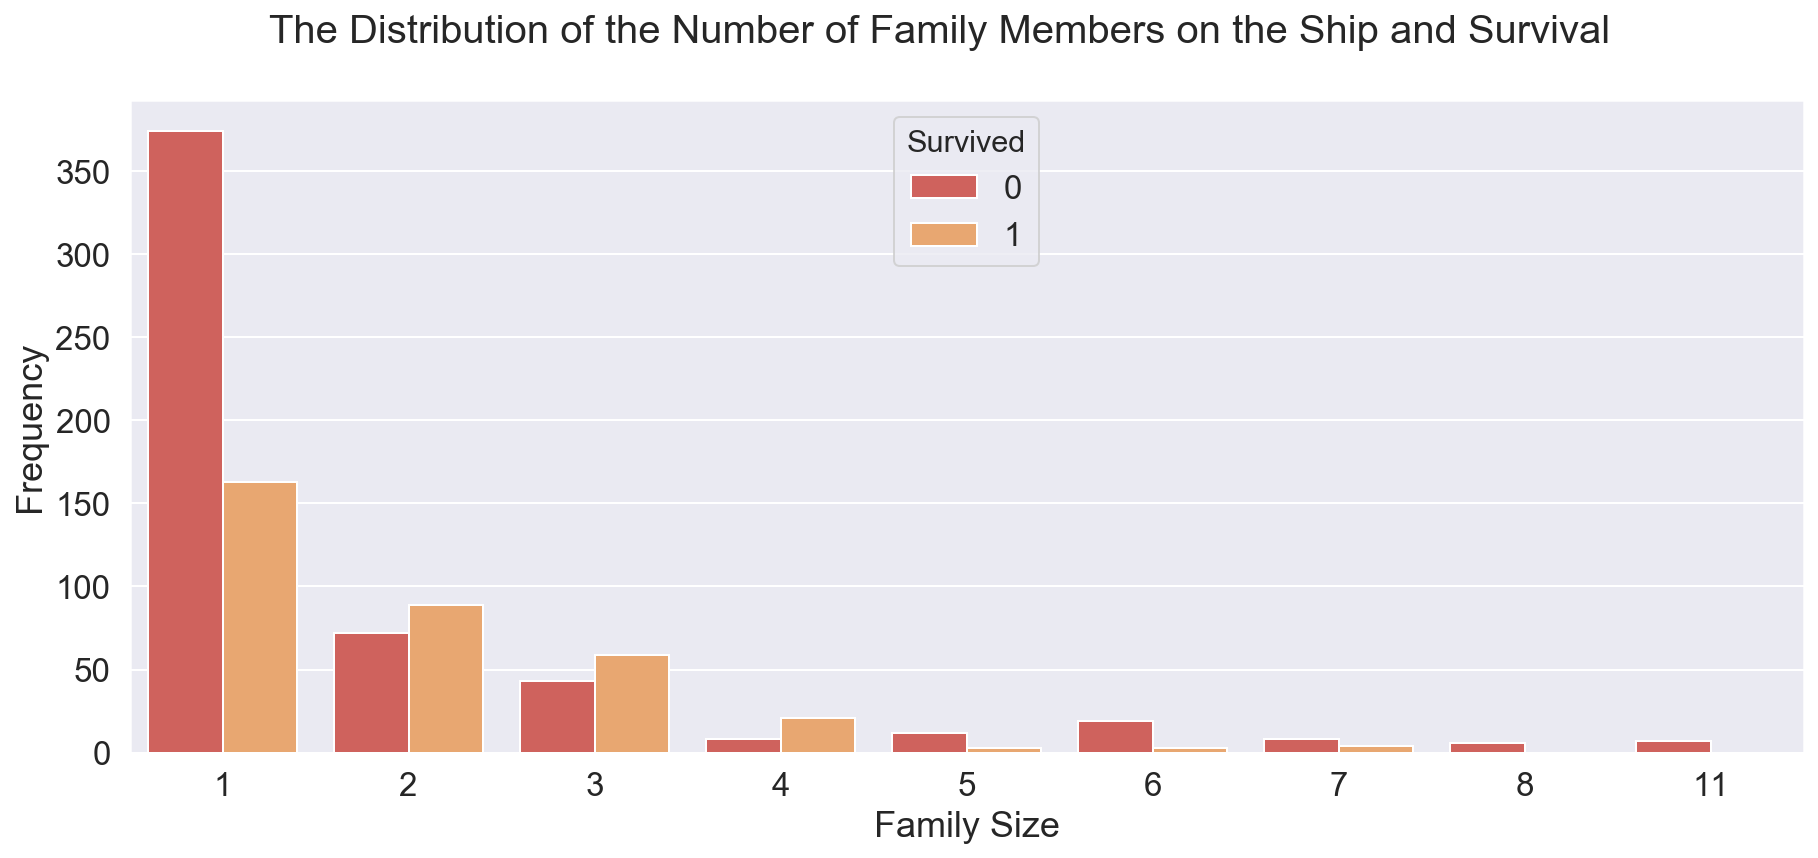

In [18]:
fig, ax = plt.subplots( figsize=(15, 6))
no_test= df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :]
sns.countplot(data = no_test , x = 'family_size' , hue = 'Survived', palette=color_sns)

ax.set_xlabel('Family Size')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of the Number of Family Members on the Ship and Survival', fontsize = 20)

plt.show()

In [19]:
df['is_alone'] = np.where((df['family_size']== 1) , 1, 0)

In [20]:
family_names_in_train_test = [x for x in df.loc[df['Survived']!= 44]['family_name'].unique() if x in df.loc[df['Survived']== 44]['family_name'].unique()]

In [21]:
non_test_family_df= df.drop( df[ df['Survived'] == 44 ].index )
family_survival_map = non_test_family_df[['family_name', 'Survived']].groupby(['family_name'], as_index=False).mean().sort_values(by='Survived', ascending=False).set_index('family_name').to_dict()['Survived']
df['family_survival_rate']= df.loc[df['family_name'].isin(family_survival_map)]['family_name'].replace(family_survival_map)
df['family_survival_rate']= df['family_survival_rate'].fillna(-1)

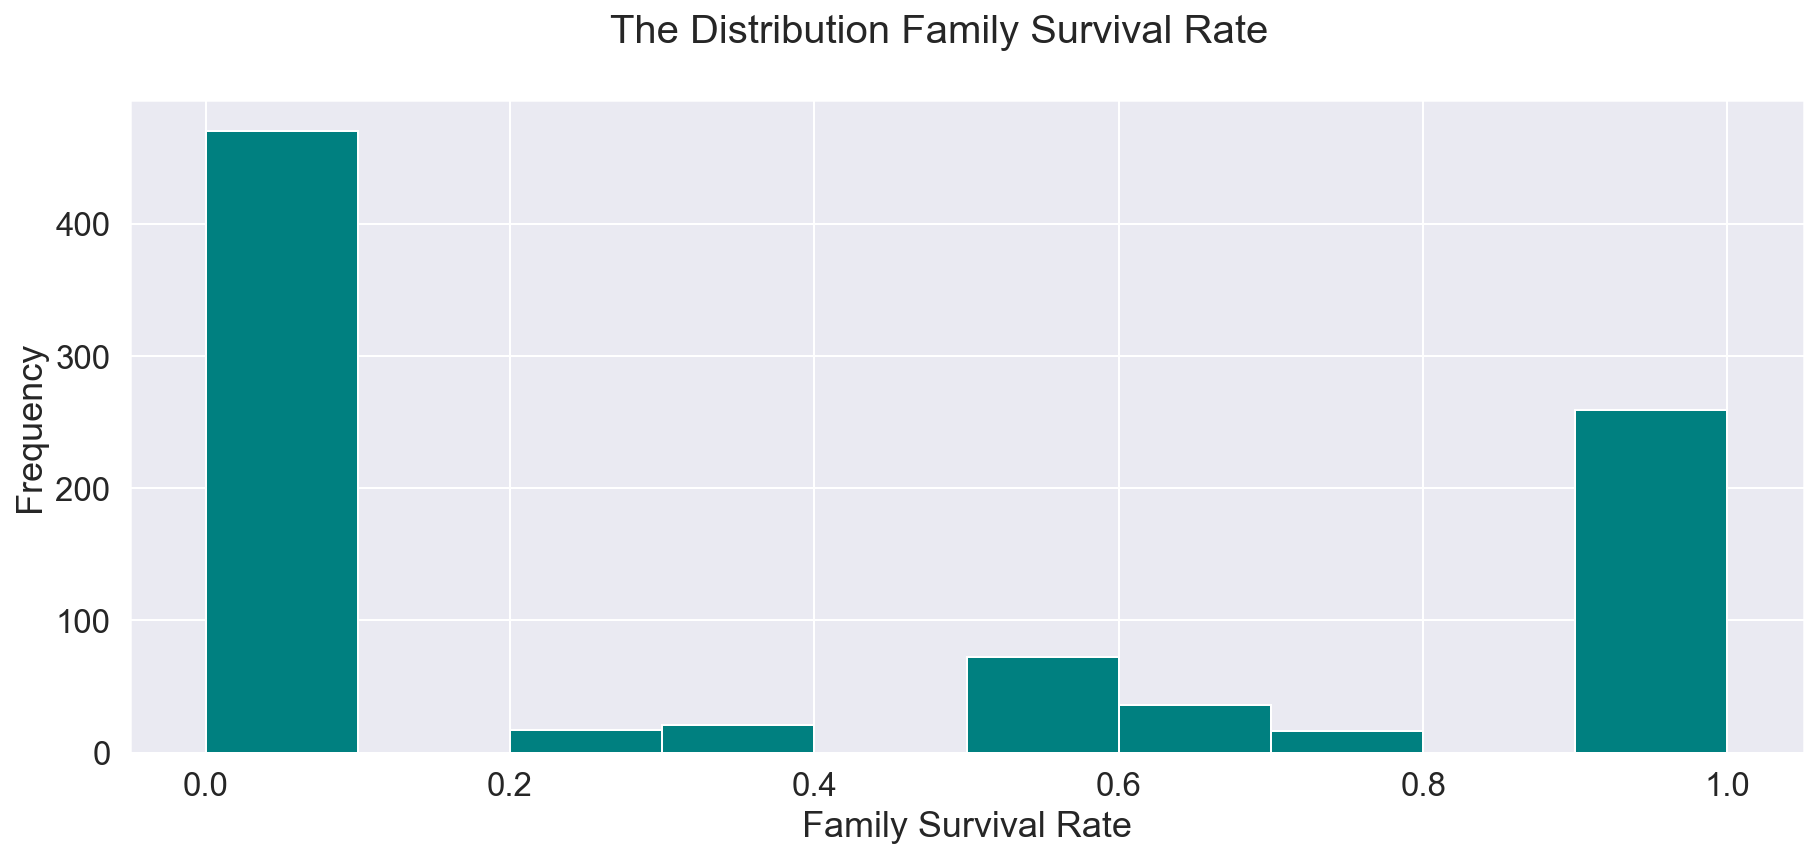

In [22]:
fig, ax = plt.subplots( figsize=(15, 6))
no_test= df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :]
ax.hist(no_test['family_survival_rate'], color = color_hist)

ax.set_xlabel('Family Survival Rate')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution Family Survival Rate', fontsize = 20)

plt.show()

In [23]:
# Getting title from name:
df['title']= df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [24]:
title_map={
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Rev": "Other",
    "Dr": "Other",
    "Col": "Other",
    "Ms": "Mrs",
    "Mlle": "Miss",
    "Major": "Other",
    "Dona": "Other",
    "Mme": "Mrs",
    "Sir" : "Royal",
    "Capt": "Other", 
    "Lady" : "Royal", 
    "Don": "Other",
    "the Countess": "Royal", 
    "Jonkheer" : "Other",   
    }
df['title'] = df['title'] .replace(title_map)

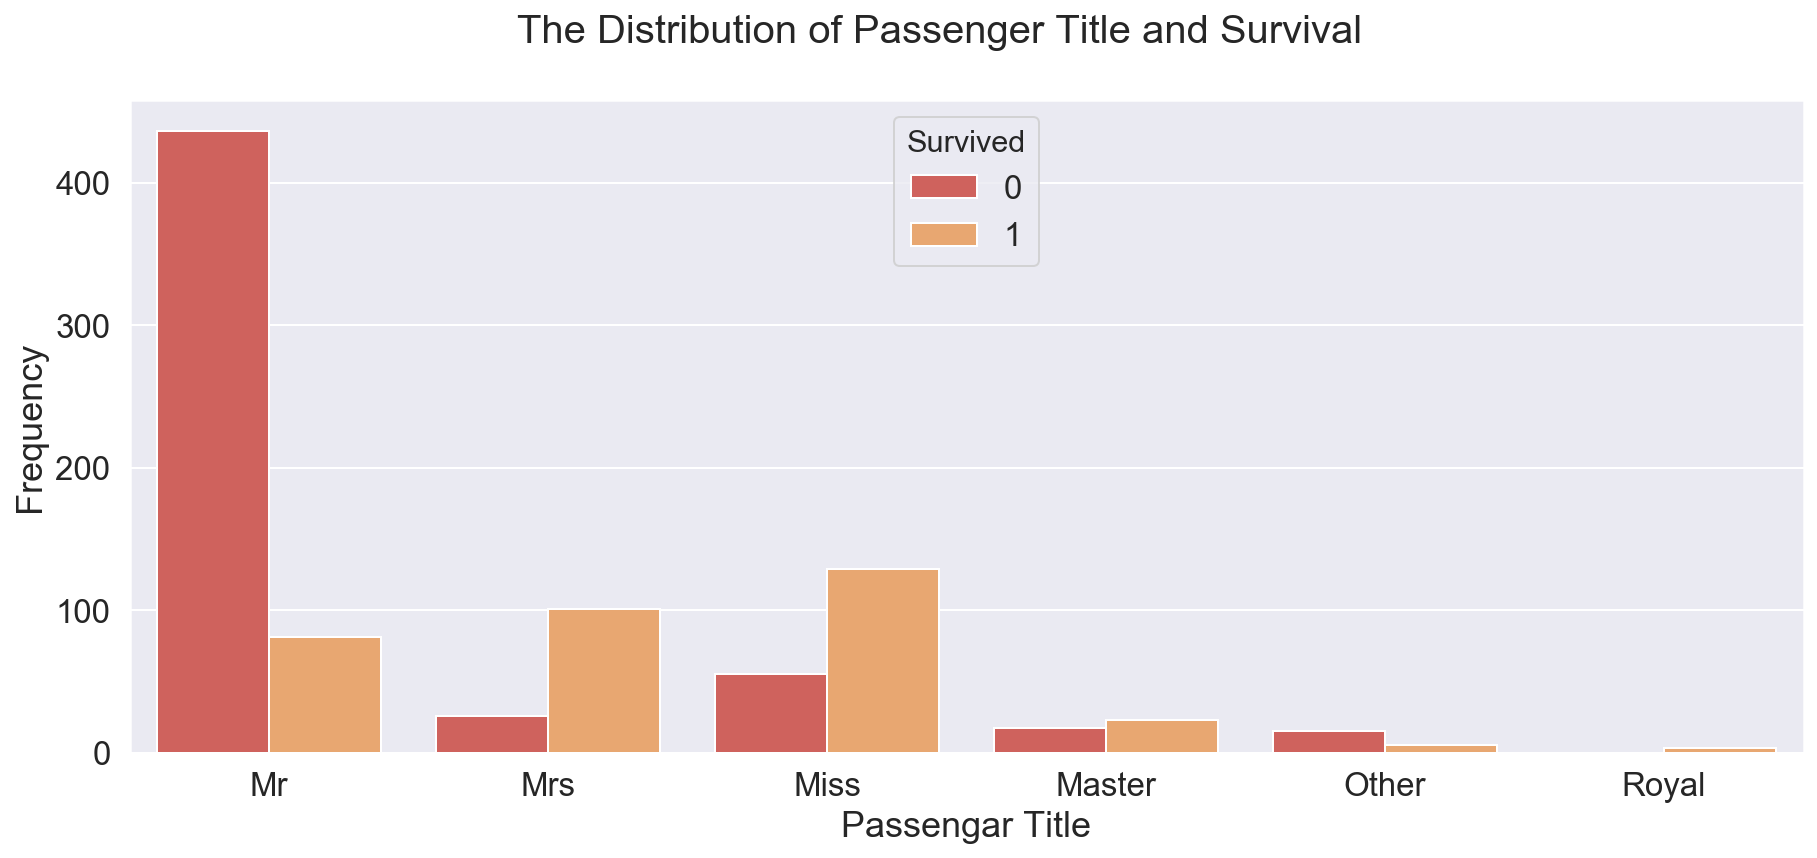

In [25]:
fig, ax = plt.subplots( figsize=(15, 6))
no_test= df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :]
sns.countplot(data = no_test , x = 'title' , hue = 'Survived', palette=color_sns)

ax.set_xlabel('Passengar Title')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of Passenger Title and Survival', fontsize = 20)

plt.show()

In [26]:
df['marrid_female'] = np.where((df['title']== 'Mrs') , 1, 0)

In [27]:
title_map={
    "Mr": "Mr",
    "Miss": "Miss/Mrs",
    "Mrs": "Miss/Mrs",
    "Master": "Master",
    "Other": "Other",
    "Royal": "Other",
    }
df['title'] = df['title'] .replace(title_map)

In [28]:
# why there are some people with same ticket number? group them and see.
df['Ticket'].value_counts()

CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347082       7
            ..
2628         1
113786       1
330932       1
335097       1
350408       1
Name: Ticket, Length: 929, dtype: int64

In [29]:
# finding the number of people traveling in groups from the ticket number, as all of them will have the same ticket number
df['group_size_by_ticket']= df.groupby('Ticket')['Ticket'].transform('count')

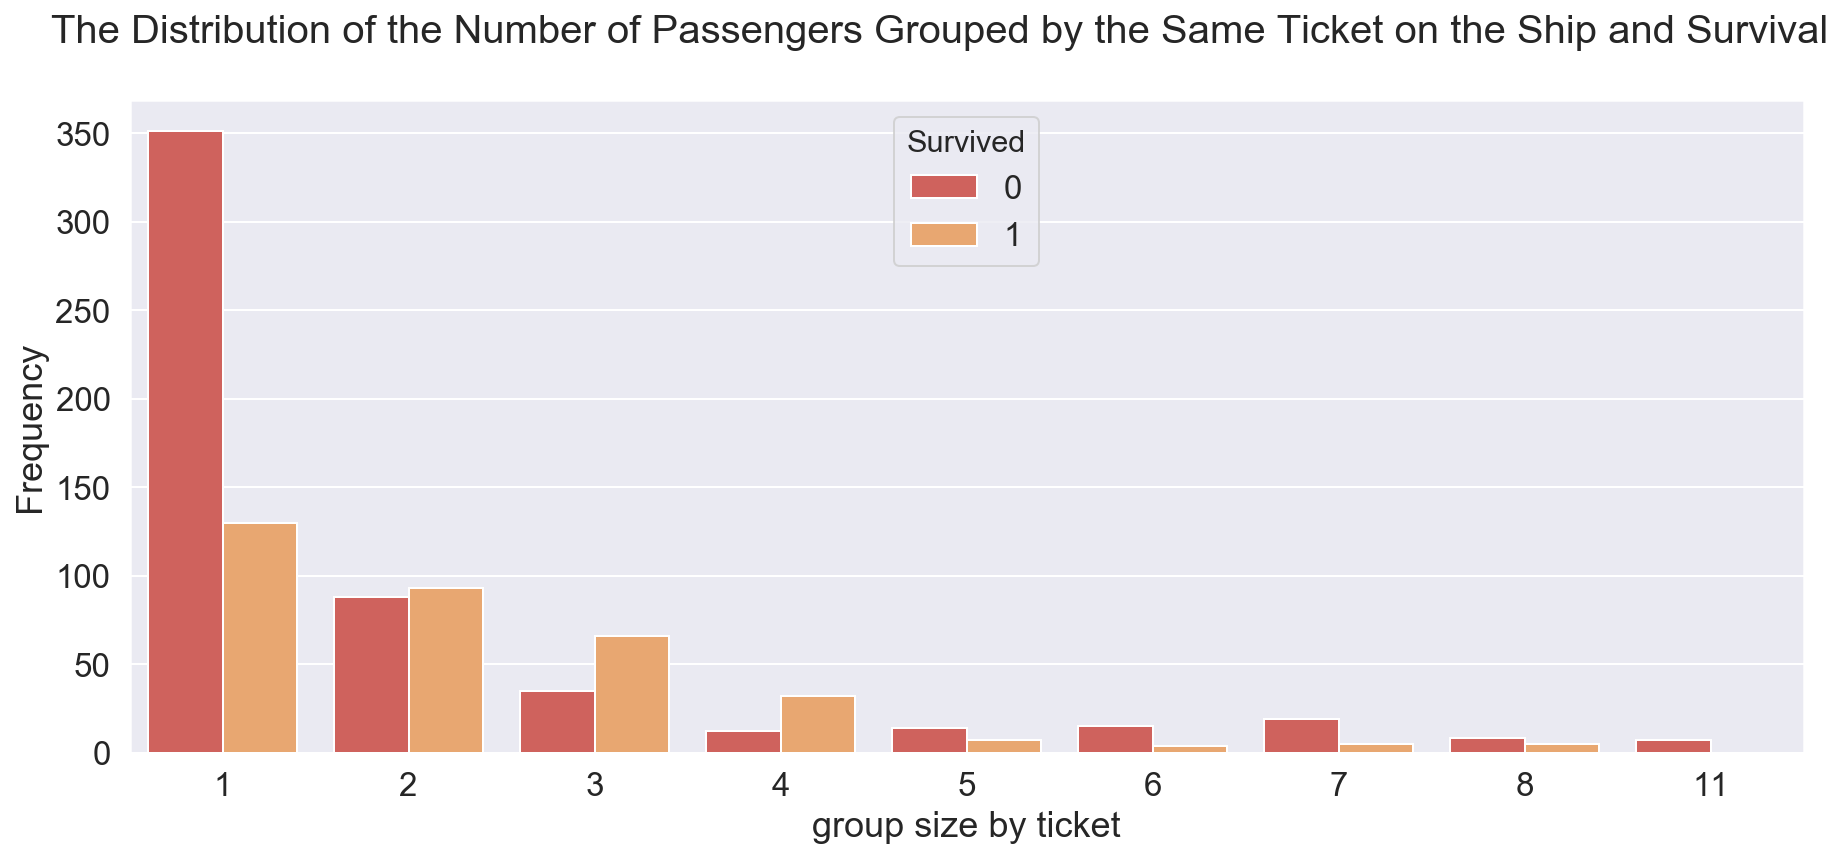

In [30]:
fig, ax = plt.subplots( figsize=(15, 6))
no_test= df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :]
sns.countplot(data = no_test , x = 'group_size_by_ticket' , hue = 'Survived', palette=color_sns)

ax.set_xlabel('group size by ticket')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of the Number of Passengers Grouped by the Same Ticket on the Ship and Survival', fontsize = 20)

plt.show()

Sometimes there are a difference between the size of the family and the size of the travelling group!! why? 
Maybe it's because they have friends travelling with them or mabe some maids and helpers.

In [31]:
non_test_ticket_df= df.drop( df[ df['Survived'] == 44 ].index )
group_survival_map = non_test_ticket_df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean().sort_values(by='Survived', ascending=False).set_index('Ticket').to_dict()['Survived']
df['group_survival_rate']= df.loc[df['Ticket'].isin(group_survival_map)]['Ticket'].replace(group_survival_map)
df['group_survival_rate']= df['group_survival_rate'].fillna(-1)

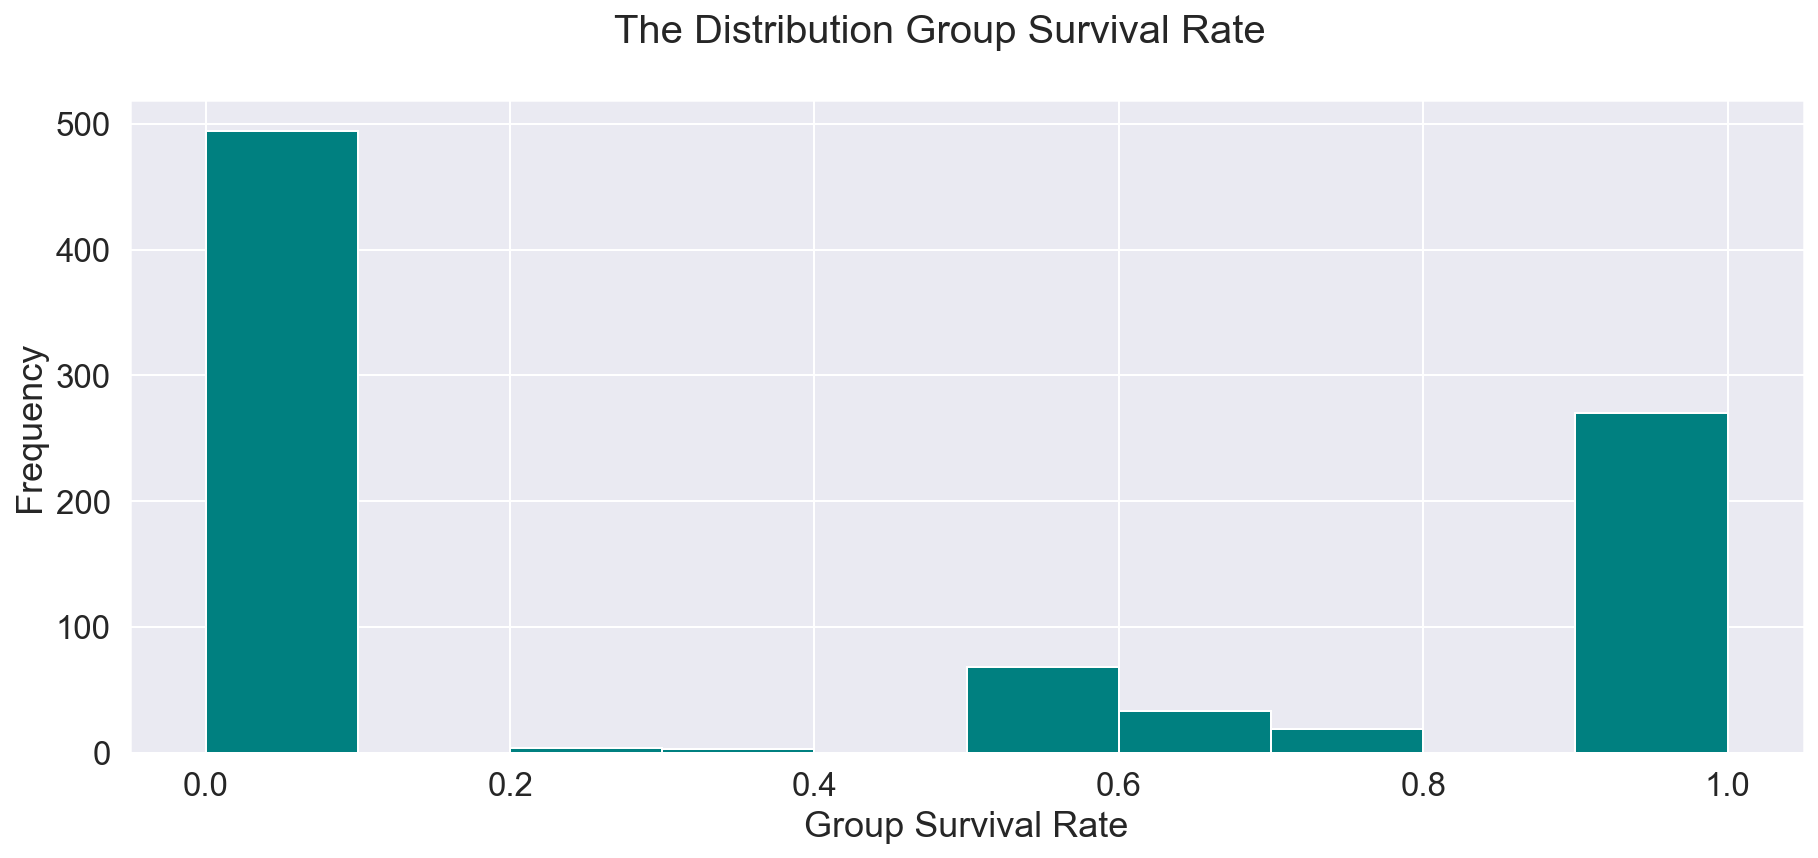

In [32]:
fig, ax = plt.subplots( figsize=(15, 6))
no_test= df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :]
ax.hist(no_test['group_survival_rate'], color = color_hist)

ax.set_xlabel('Group Survival Rate')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution Group Survival Rate', fontsize = 20)

plt.show()

In [33]:
df['survival_rate'] = (df['group_survival_rate'] + df['family_survival_rate'])/2
df['survival_rate'] = df['survival_rate'].fillna(-1)
df= df.drop (['group_survival_rate' ,'family_survival_rate'], axis=1)

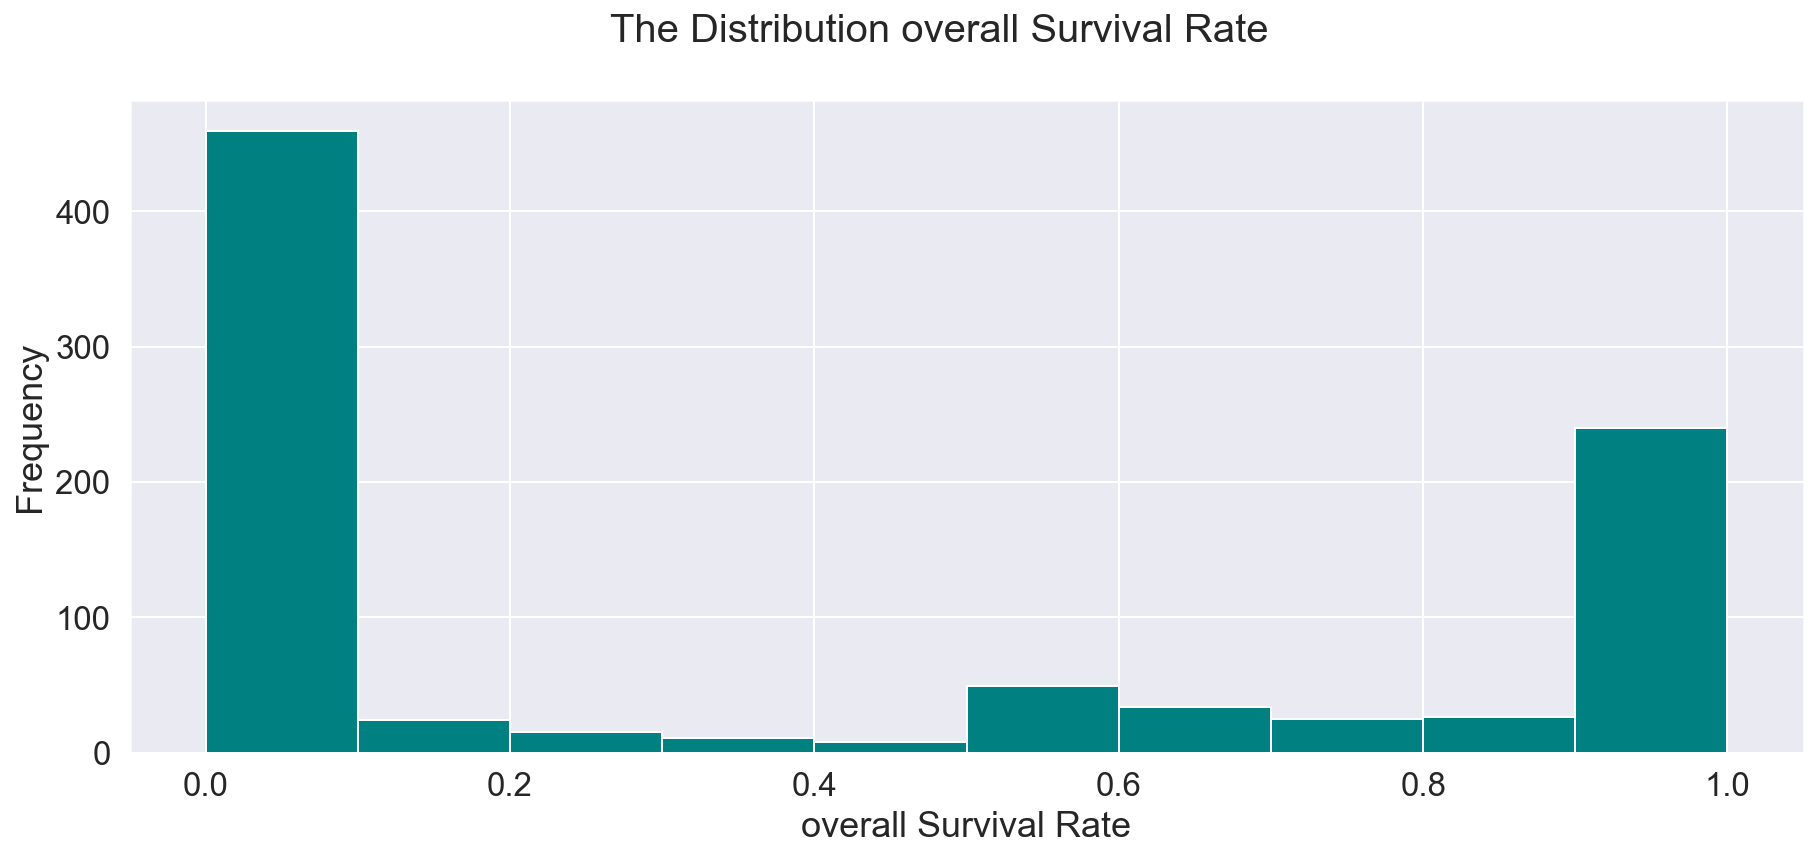

In [34]:
fig, ax = plt.subplots( figsize=(15, 6))
no_test= df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :]
ax.hist(no_test['survival_rate'], color = color_hist)

ax.set_xlabel('overall Survival Rate')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution overall Survival Rate', fontsize = 20)

plt.show()

when multible people have the same ticket number, they will have the same fare as well, so it it safe to assume that they divide the fare between themselves.
Therefore the actual individual fare is Fare / group_size_by_ticket

In [35]:
df['individual_fare'] = df['Fare']/ df['group_size_by_ticket']

In [36]:
 # if a female's title is not miss, and have parch then she's a mother 
df['is_mother']= np.where((df['Sex']=="female")& (df['title'] != 'Miss') & (df['Parch'] > 0) , 1, 0)

#### 4a. How complete is the data? and any Issues

Text(0.5, 1, 'Main Data Frame')

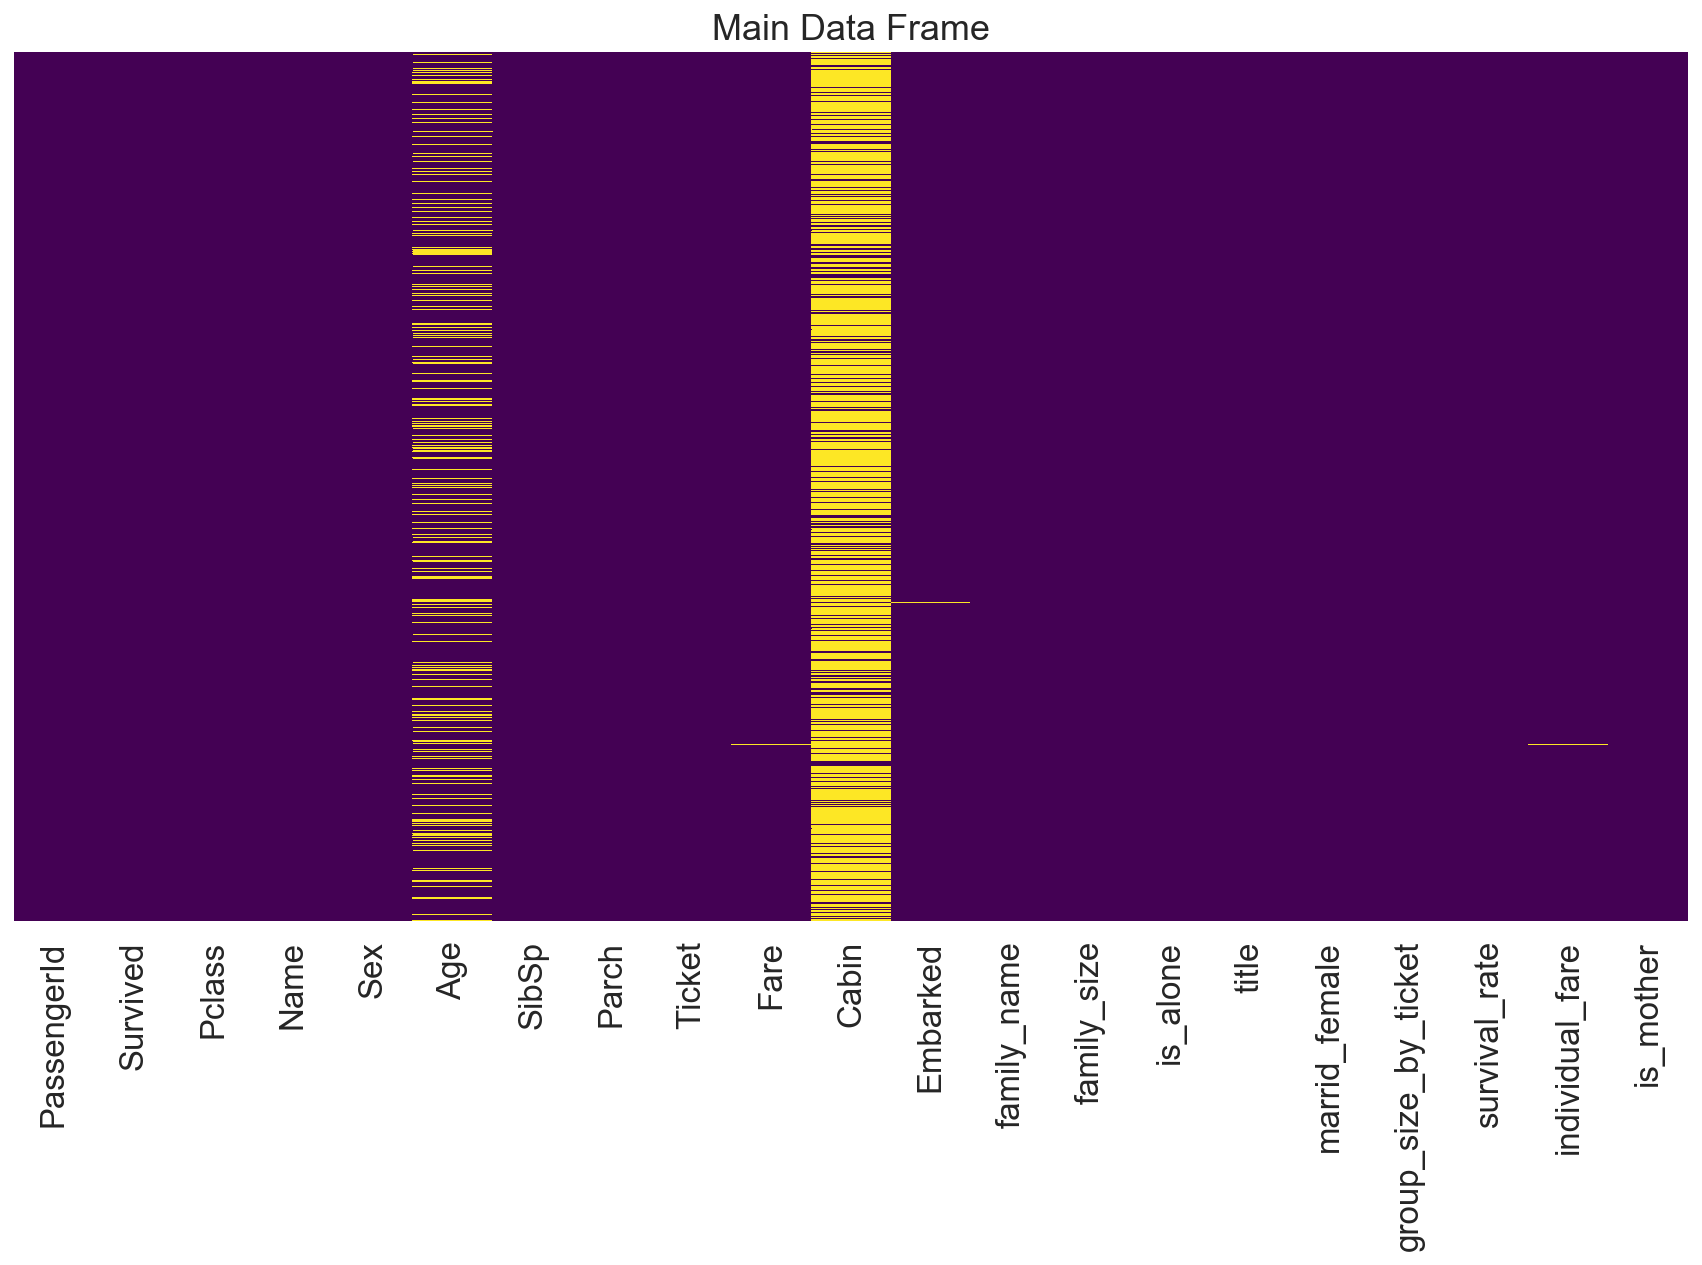

In [37]:
# checking the missing value in the train & test dataset
fig, ax = plt.subplots( figsize = (15, 8))

# train data 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
ax.set_title('Main Data Frame')

In [38]:
#Finding missing data and the percentage of it in each column
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])
missing_data

,Total_NaN,Percent_Nan
Cabin,1014,0.774637
Age,263,0.200917
Embarked,2,0.001528
individual_fare,1,0.000764
Fare,1,0.000764
Ticket,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000


In [39]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family_name',
       'family_size', 'is_alone', 'title', 'marrid_female',
       'group_size_by_ticket', 'survival_rate', 'individual_fare',
       'is_mother'],
      dtype='object')

#### 5. What are your data types? 

In [40]:
df.dtypes

PassengerId               int64
Survived                  int64
Pclass                    int64
Name                     object
Sex                      object
Age                     float64
SibSp                     int64
Parch                     int64
Ticket                   object
Fare                    float64
Cabin                    object
Embarked                 object
family_name              object
family_size               int64
is_alone                  int64
title                    object
marrid_female             int64
group_size_by_ticket      int64
survival_rate           float64
individual_fare         float64
is_mother                 int64
dtype: object

#### 7. Create a data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|PassengerId|int|df|Passenger id|
|Survived|int|df|Survival as 0 = No, 1 = Yes|
|Pclass|int|df|Ticket class as 1 = 1st, 2 = 2nd, 3 = 3rd|
|Name|object|df|Name of the passenger|
|Sex|object|df|Sex / Gender|
|Age|float|df|Age in years|
|SibSp|int|df|Number of siblings / spouses aboard the Titanic|
|Parch|int|df|Number of parents / children aboard the Titanic|
|Ticket|object|df|Ticket number|
|Fare|float|df|Passenger fare|
|Cabin|object|df|Cabin number|
|Embarked|object|df|Port of Embarkation as C = Cherbourg, Q = Queenstown, S = Southampton|

# Data Cleaning

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


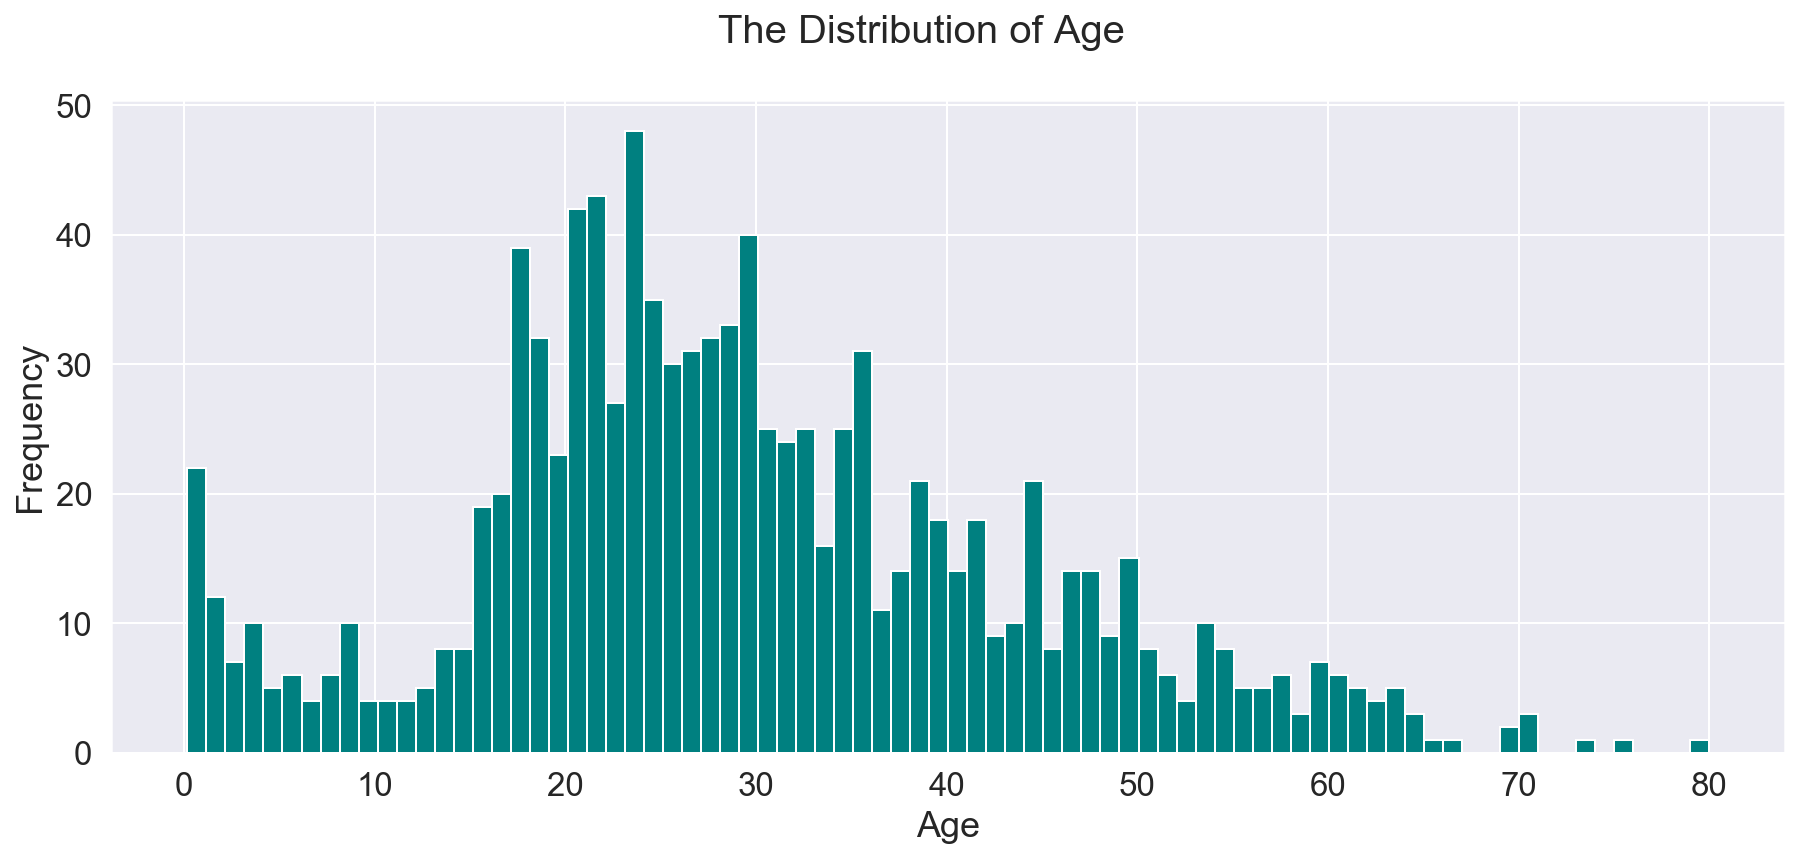

In [41]:
fig, ax = plt.subplots( figsize=(15, 6))
ax.hist(df['Age'], bins = 80, color = color_hist)

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of Age', fontsize = 20)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show();

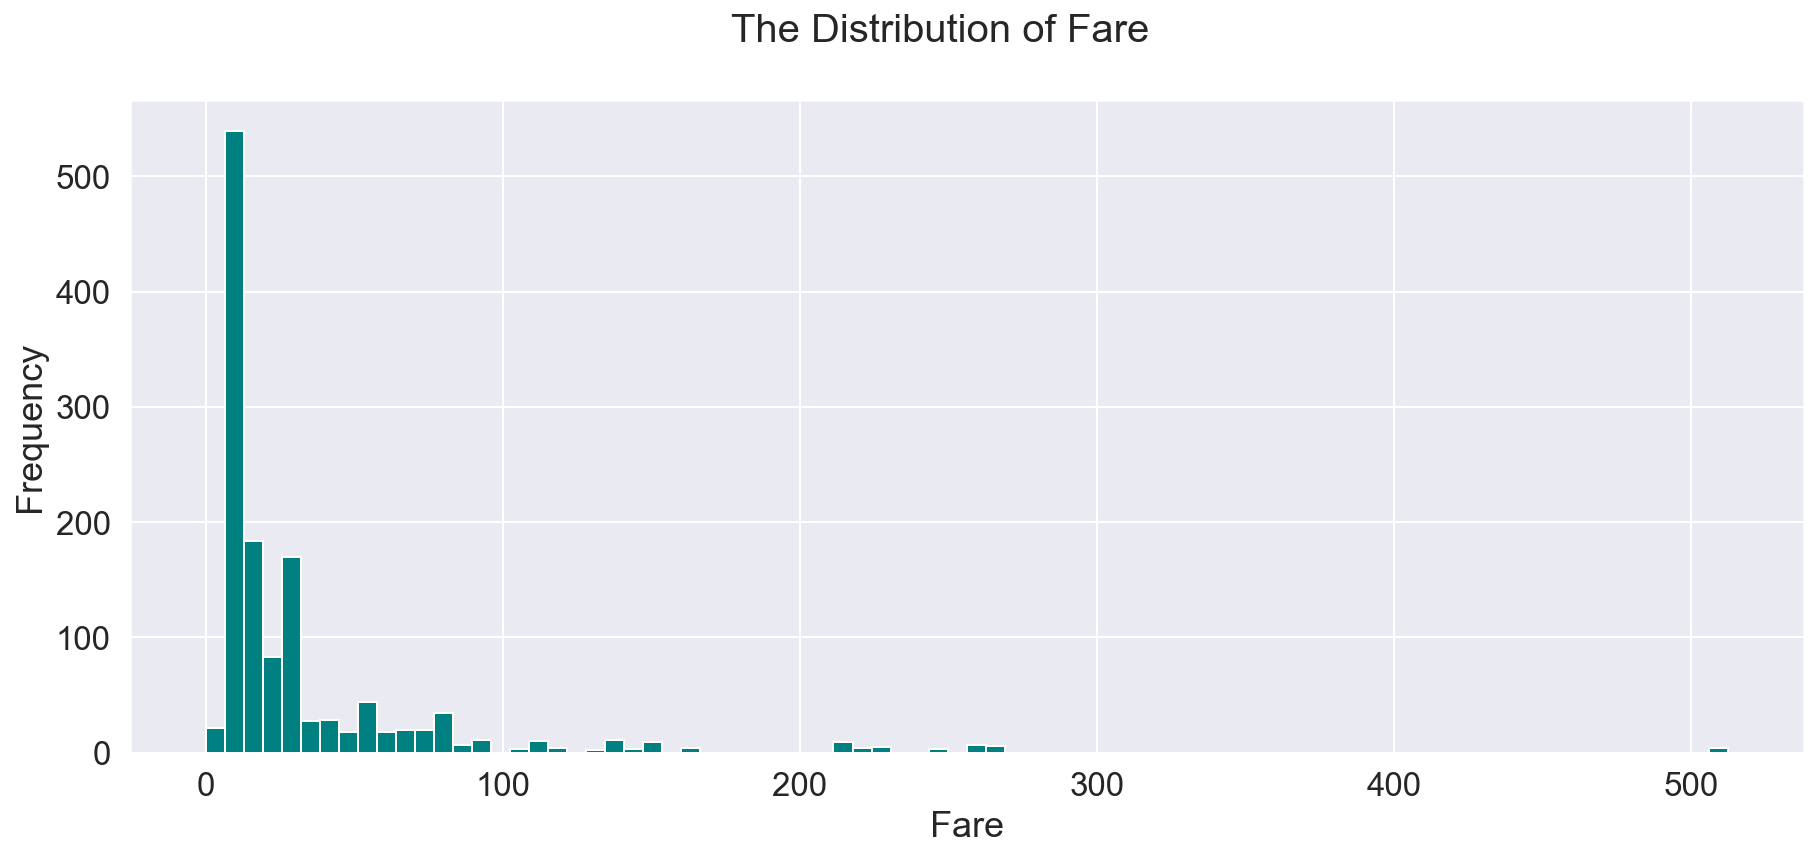

In [42]:
fig, ax = plt.subplots( figsize=(15, 6))
ax.hist(df['Fare'], bins = 80, color = color_hist)

ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of Fare', fontsize = 20)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show();

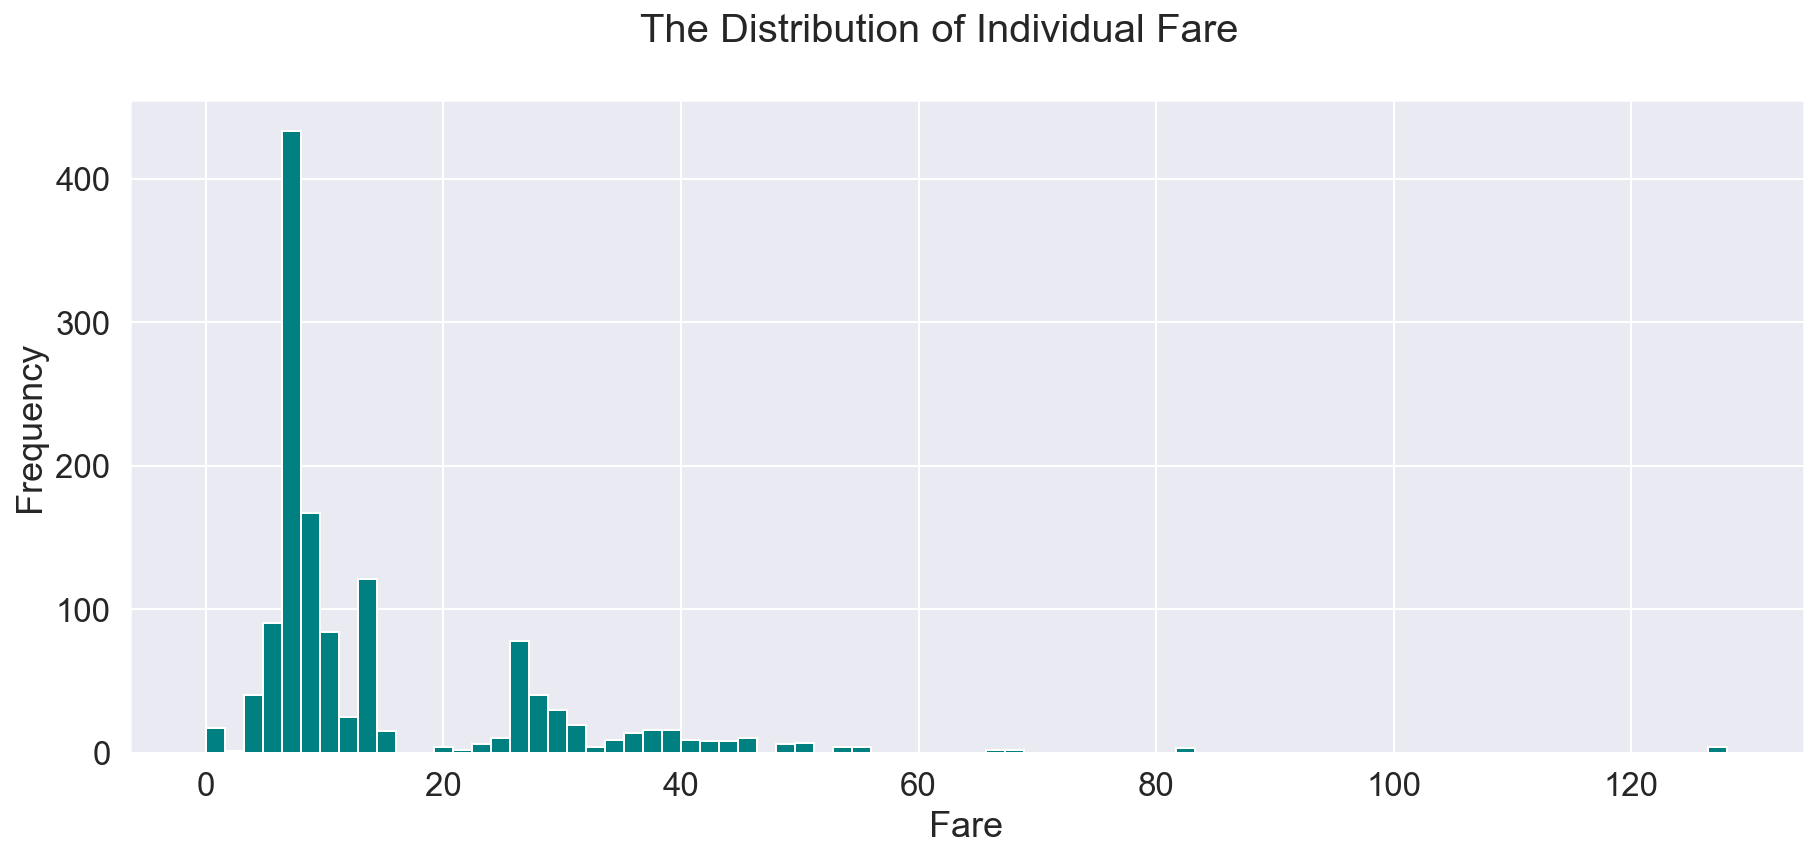

In [43]:
fig, ax = plt.subplots( figsize=(15, 6))
ax.hist(df['individual_fare'], bins = 80, color = color_hist)

ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of Individual Fare', fontsize = 20)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show();

### Filling Age missing data
we tried filling the Age missing data by different ways, but the filling with considering the sex and pclass gave use the highest score in Kaggle

In [44]:
# Defining the function 'impute_age' to fill the mean age with respect to each Pclass
def impute_age(age_pclass): # passing age_pclass as ['Age', 'Pclass']
    
    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    
    # Applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [45]:
# Grabing age and apply the impute_age function with the train data frame
#df['Age'] = df.apply(lambda x:impute_age(x[['Age', 'Pclass']]), axis = 1)

# Tried filling by considering different columns (Ages of mothers)
#df.loc[df["is_mother"]==1, "Age"].fillna(df.loc[df["is_mother"]==1 , "Age"].median(), inplace = True)
#df.loc[df["Parch"]==0, "Age"].fillna(df.loc[df["Parch"]==0, "Age"].median(), inplace = True)
#remaining null values substituted by median age of Sex+Title
#df["Age"].fillna(df.groupby(['Sex','title'])["Age"].transform("median"), inplace=True) # Fill age based on median 


# filling missing ages with 
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(int(x.median())))

In [46]:
# Extracting Deck from cabin
df['Cabin']= df['Cabin'].fillna('M')
df['Cabin']= df['Cabin'].str.replace('\d+', '')
df['Cabin']= df['Cabin'].str.split(' ', expand=True)[0]

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5d/Titanic_side_plan_annotated_English.png" style="height: 300px; width: 900px">

In [47]:
# mapping cabin names to deck names 
cabin_map= {'T':'A', 'A':'A', 'B':'B', 'C':'C', 'D':'D', 'E':'E', 'F':'F', 'G':'G' , 'M':'M'}
df['Deck'] = df['Cabin'].replace(cabin_map)
df['Deck'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      23
F      21
G       5
Name: Deck, dtype: int64

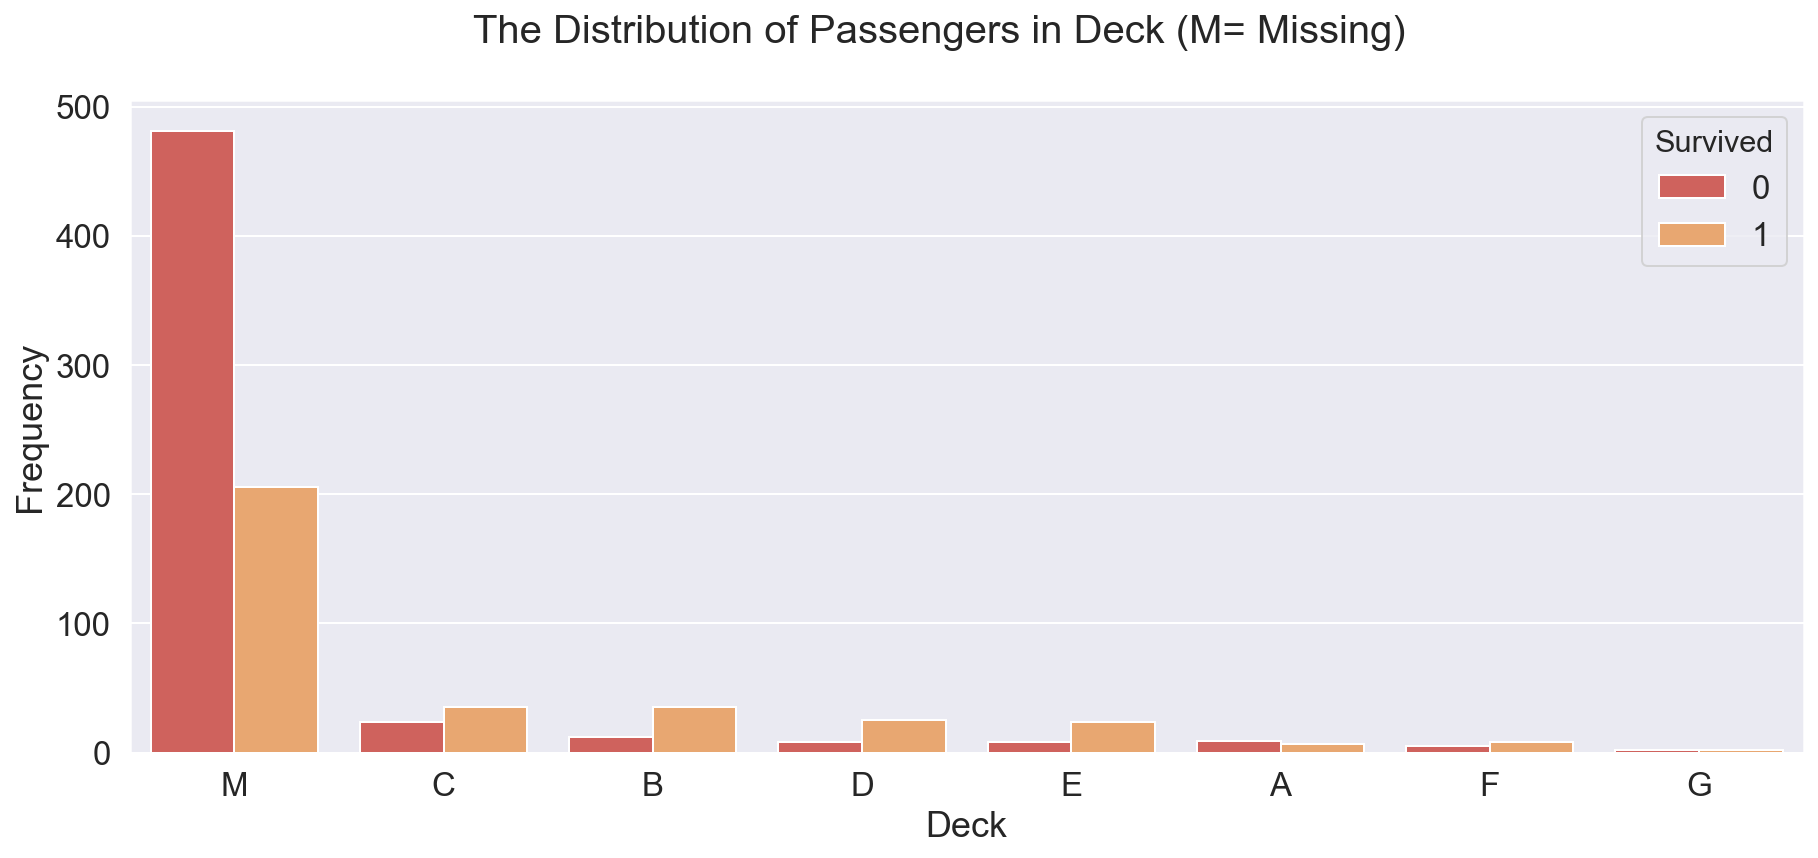

In [48]:
fig, ax = plt.subplots( figsize=(15, 6))
no_test= df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :]
sns.countplot(data = no_test , x = 'Deck' , hue = 'Survived', palette=color_sns, order = no_test['Deck'].value_counts().index)

ax.set_xlabel('Deck')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of Passengers in Deck (M= Missing)', fontsize = 20)

plt.show()

In [49]:
cabin_map= {'T':'ABC', 'A':'ABC', 'B':'ABC', 'C':'ABC', 'D':'DE', 'E':'DE', 'F':'FG', 'G':'FG' , 'M':'M'}
df['Deck'] = df['Cabin'] .replace(cabin_map)
df= df.drop ('Cabin', axis=1)
df['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [50]:
# Fill the missing rows in Embarked with the port of highest embarkation 'S' in the train data frame
df['Embarked'].fillna(value = 'S', inplace = True)

In [51]:
# Filling the missing value of Fare with the mean
df["Fare"] = df["Fare"].fillna( df.loc[(df['Pclass']==3) & ( df['Parch']==0) &( df['SibSp'] ==0)]['Fare'].median())
df["individual_fare"] = df["individual_fare"].replace(np.NaN, df["individual_fare"].mean())

In [52]:
df.isnull().sum().sum()

0

#### 11. Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_size,is_alone,marrid_female,group_size_by_ticket,survival_rate,individual_fare,is_mother
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,14.311688,2.294882,29.256432,0.498854,0.385027,33.276044,1.883881,0.603514,0.152788,2.101604,0.138016,14.757627,0.132162
std,378.020061,20.346292,0.837836,13.218278,1.041658,0.865560,51.743657,1.583639,0.489354,0.359921,1.779832,0.653771,13.550455,0.338796
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.000000,0.000000,0.000000,1.000000,0.000000,7.550000,0.000000
50%,655.000000,1.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,1.000000,0.000000,1.000000,0.000000,8.050000,0.000000
75%,982.000000,44.000000,3.000000,36.000000,1.000000,0.000000,31.275000,2.000000,1.000000,0.000000,3.000000,0.750000,15.000000,0.000000
max,1309.000000,44.000000,3.000000,80.000000,8.000000,9.000000,512.329200,11.000000,1.000000,1.000000,11.000000,1.000000,128.082300,1.000000


In [54]:
df[df.select_dtypes('object').columns.tolist()].describe()

,Name,Sex,Ticket,Embarked,family_name,title,Deck
count,1309,1309,1309,1309,1309,1309,1309
unique,1307,2,929,3,875,4,4
top,"Kelly, Mr. James",male,CA. 2343,S,Andersson,Mr,M
freq,2,843,11,916,11,757,1014


## Survival Rate:

In [55]:
visual_df = df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :] # train set

In [56]:
visual_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [57]:
visual_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [58]:
visual_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [59]:
visual_df[["title", "Survived"]].groupby(['title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,title,Survived
1,Miss/Mrs,0.739550
0,Master,0.575000
3,Other,0.347826
2,Mr,0.156673


In [60]:
visual_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [61]:
visual_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [62]:
visual_df[['family_size', 'Survived']].groupby(['family_size'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,family_size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [63]:
visual_df[['group_size_by_ticket', 'Survived']].groupby(['group_size_by_ticket'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,group_size_by_ticket,Survived
3,4,0.727273
2,3,0.653465
1,2,0.513812
7,8,0.384615
4,5,0.333333
0,1,0.270270
5,6,0.210526
6,7,0.208333
8,11,0.000000


In [64]:

visual_df[['family_name', 'Survived']].groupby(['family_name'], as_index=False).mean().sort_values(by='Survived', ascending=False).head()
                                                                                                                        

,family_name,Survived
333,Lehmann,1.0
215,Glynn,1.0
249,Hedman,1.0
248,Healy,1.0
247,Hays,1.0


## Visualize Correlation of the data

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

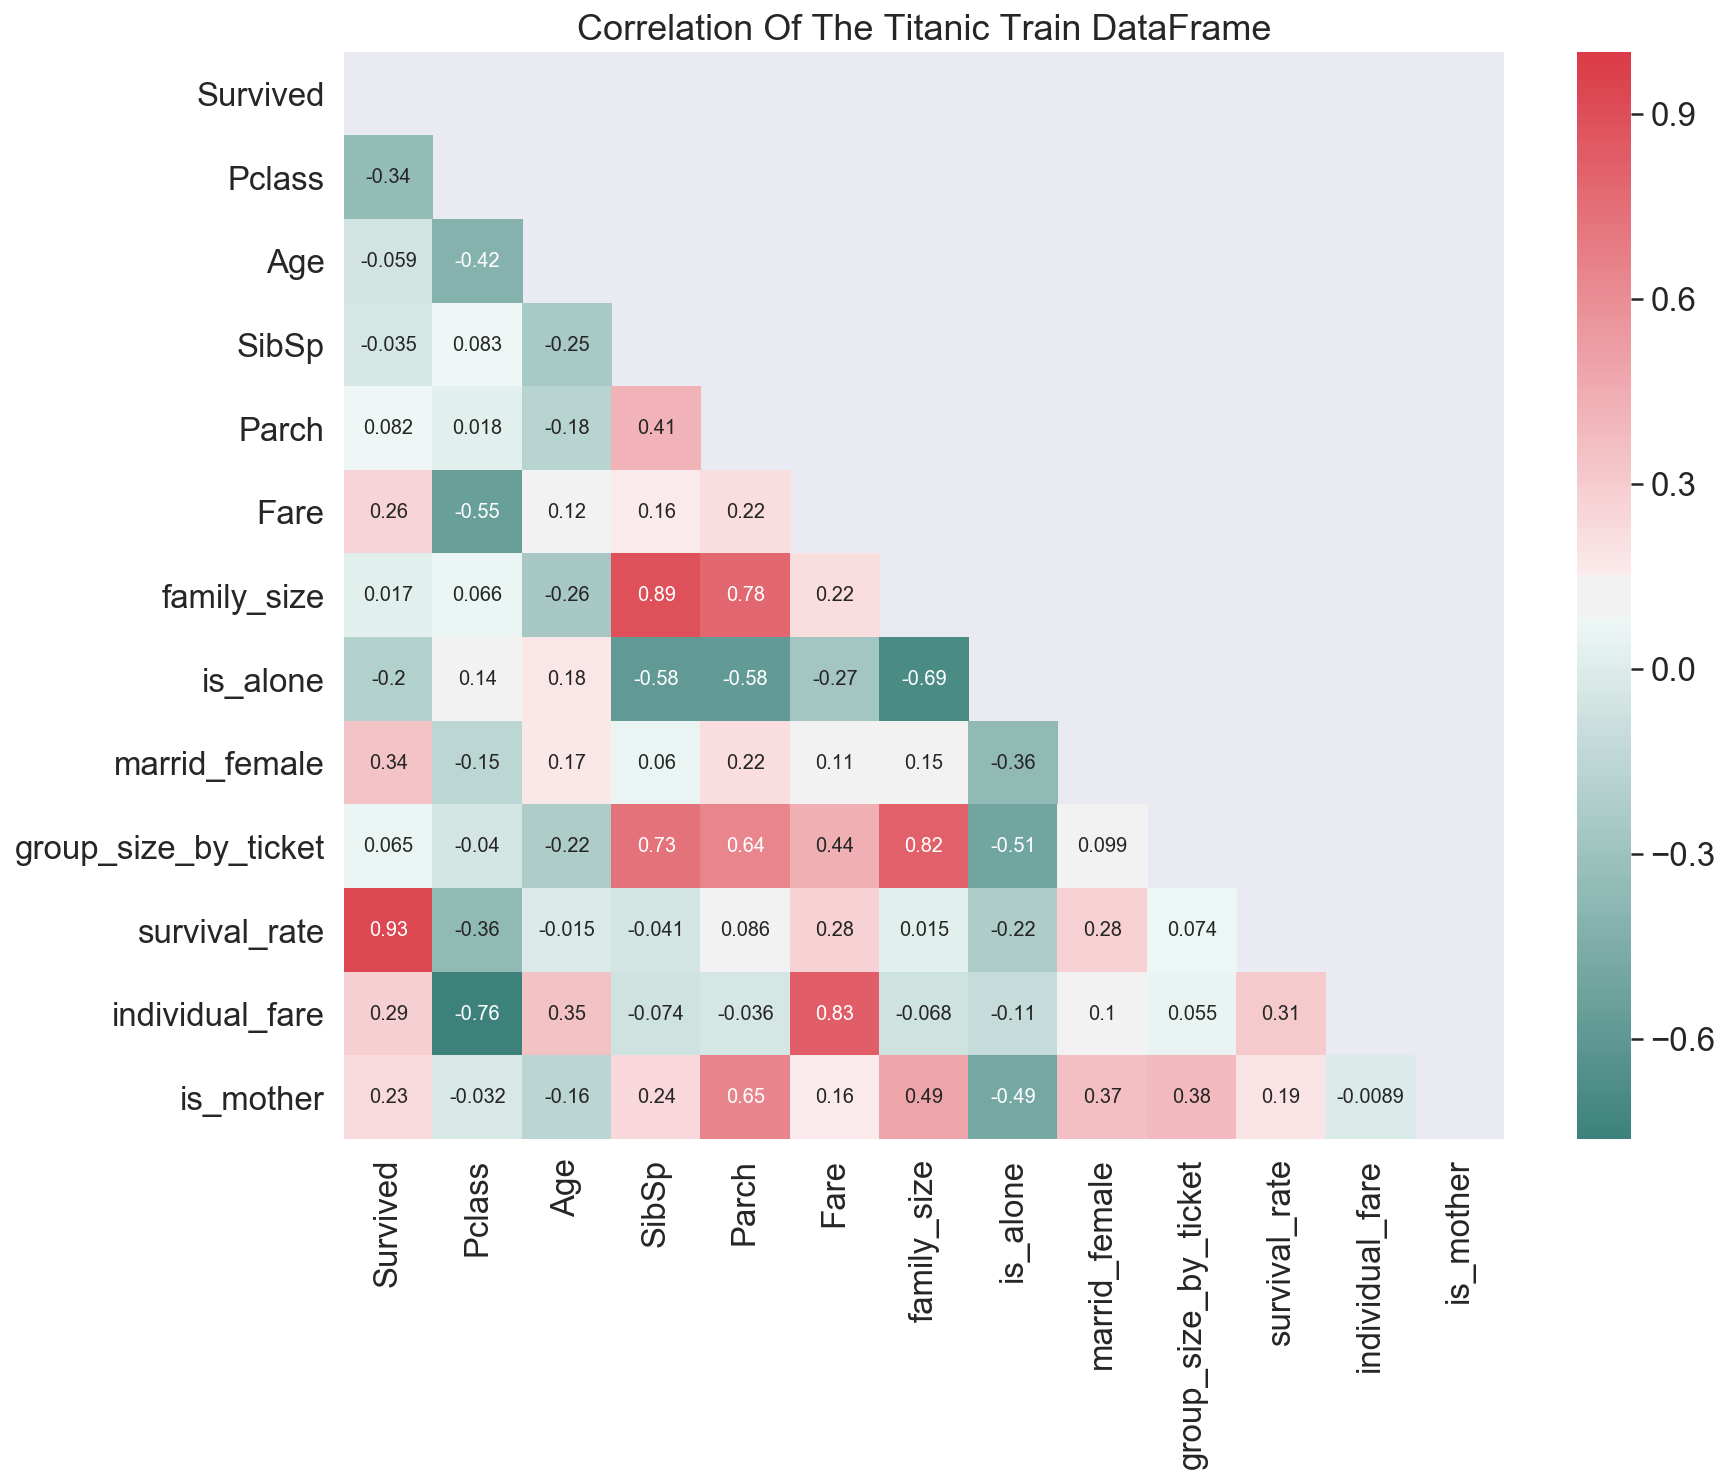

In [65]:
fig, axs = plt.subplots(figsize = (13, 10)) 
no_id_vis_df= visual_df.drop('PassengerId',axis=1 )
mask = np.triu(np.ones_like(no_id_vis_df.corr(), dtype = np.bool))
sns.heatmap(no_id_vis_df.corr(), ax = axs, annot = True, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation Of The Titanic Train DataFrame')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

## The Distribution of Numerical Columns in the Dataframe

In [66]:
# a function that takes a dataframe and transforms it into a standard form after dropping nun_numirical columns
def to_standard (df):
    
    num_df = df[df.select_dtypes(include = np.number).columns.tolist()]
    
    ss = StandardScaler()
    std = ss.fit_transform(num_df)
    
    std_df = pd.DataFrame(std, index = num_df.index, columns = num_df.columns)
    return std_df

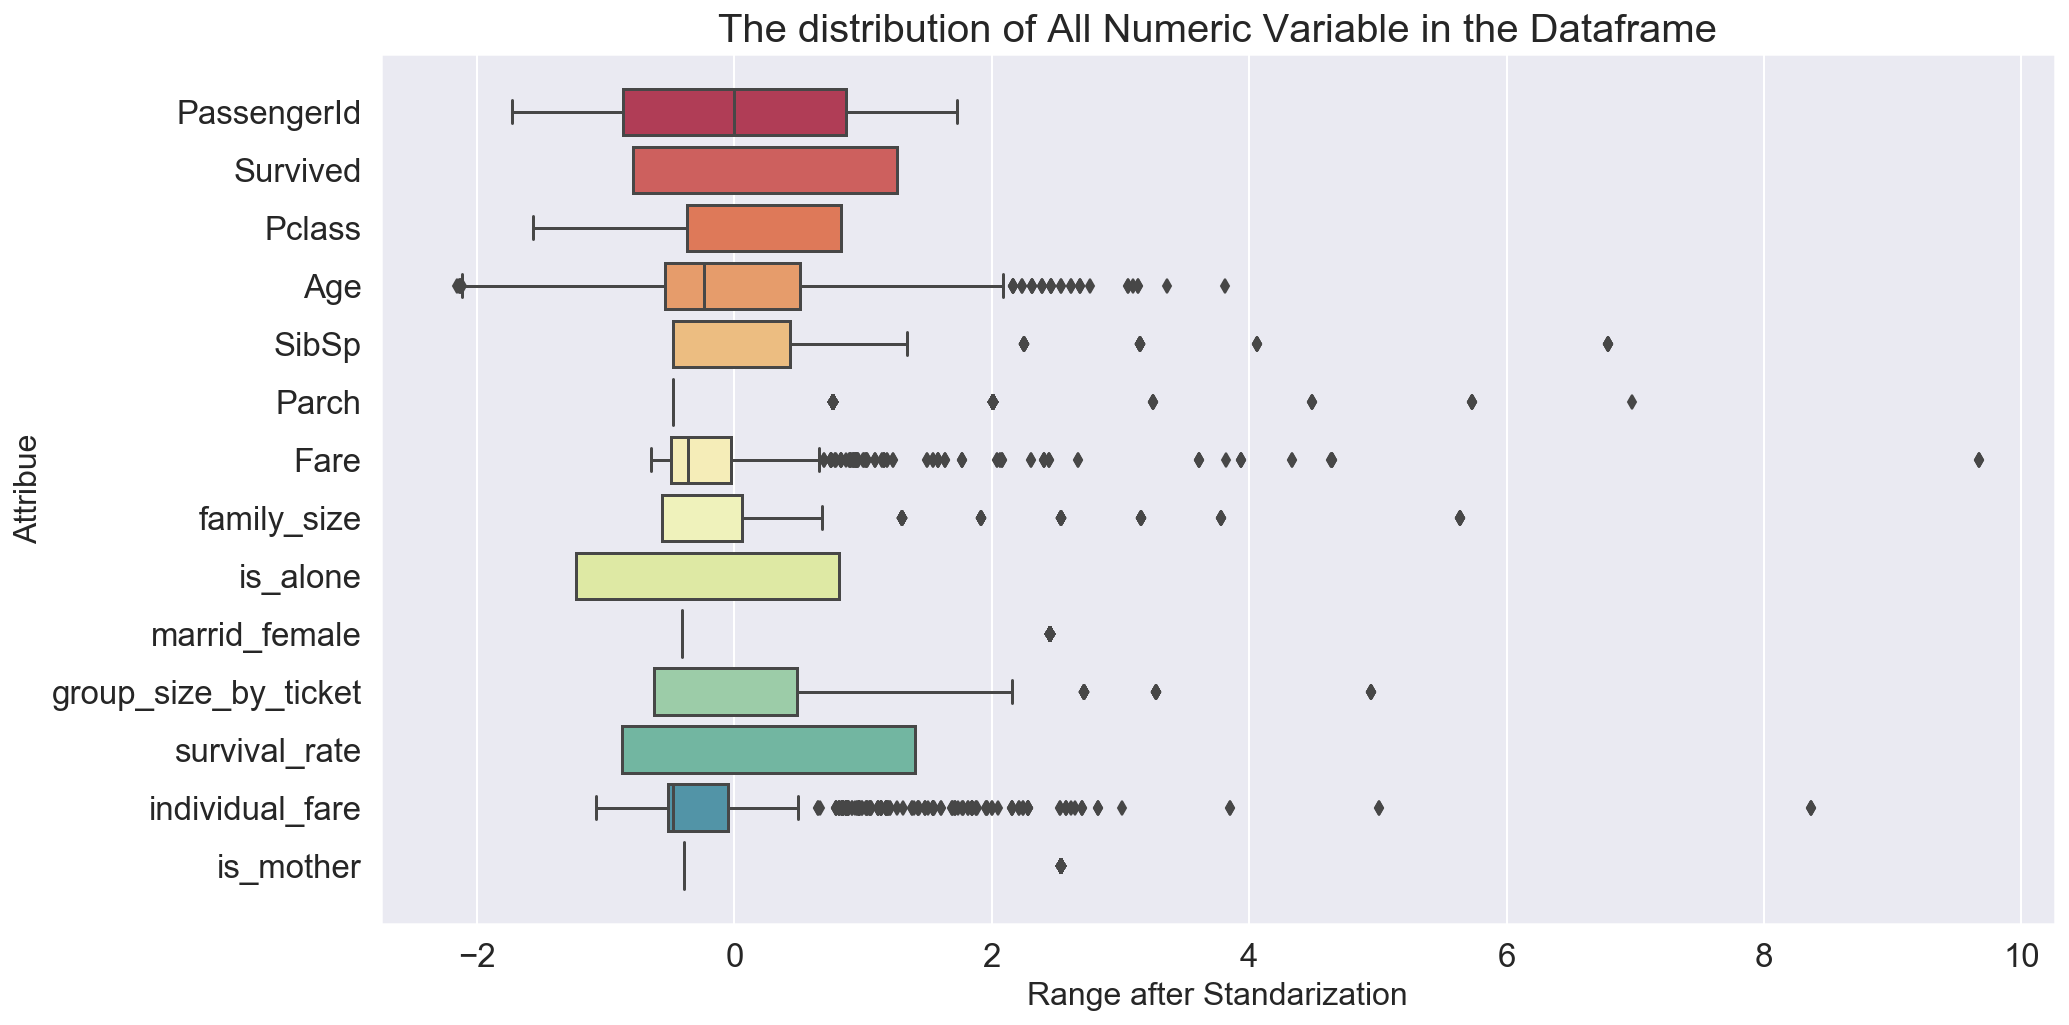

In [67]:
ax, fig = plt.subplots(1, 1, figsize = (15, 8))
plt.title('The distribution of All Numeric Variable in the Dataframe', fontsize = 20) #Change please

sns.boxplot(y = "variable", x = "value", data = pd.melt(to_standard(visual_df)), palette = 'Spectral')
plt.xlabel('Range after Standarization', size = 16)
plt.ylabel('Attribue', size = 16)


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

Text(0, 0.5, 'count')

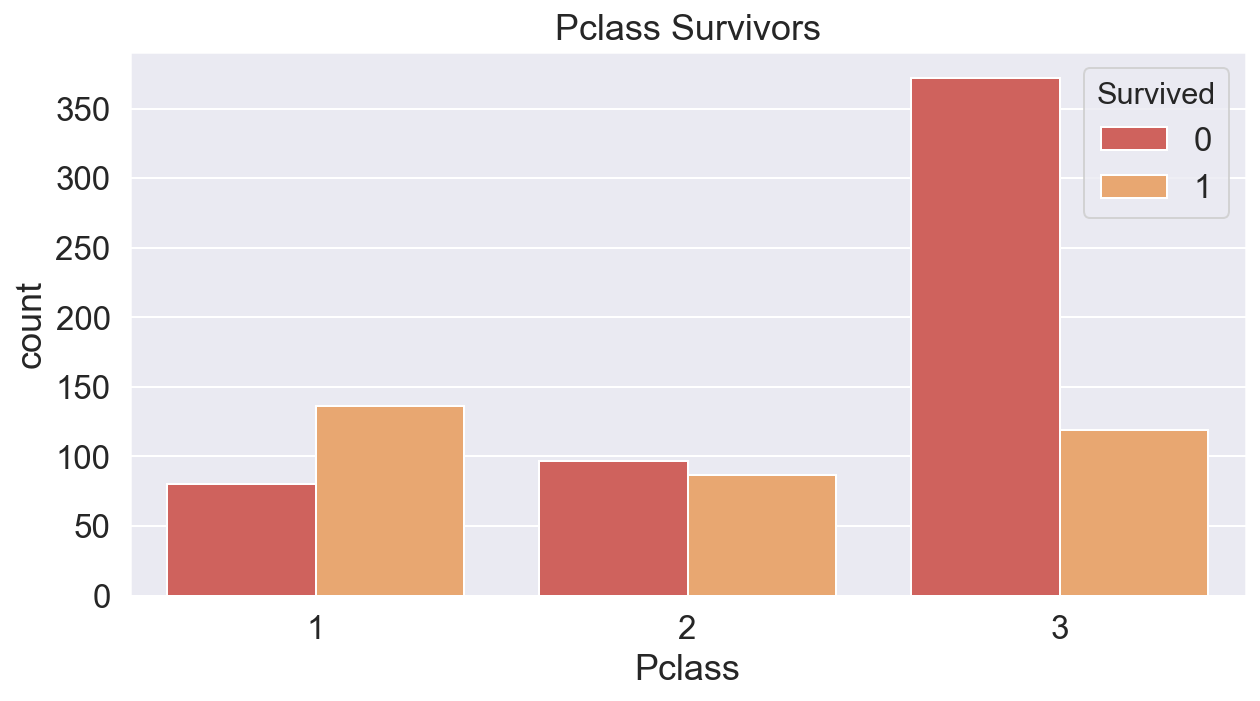

In [68]:
plt.figure(figsize=(10,5))
no_test= df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :]
ax = sns.countplot(x="Pclass", data=no_test, hue= 'Survived', palette = color_sns)
plt.title('Pclass Survivors')
plt.xlabel('Pclass')
plt.ylabel('count')

Text(0.5, 1.0, 'The distribution of Individual Fare with Embarked and Pclass ')

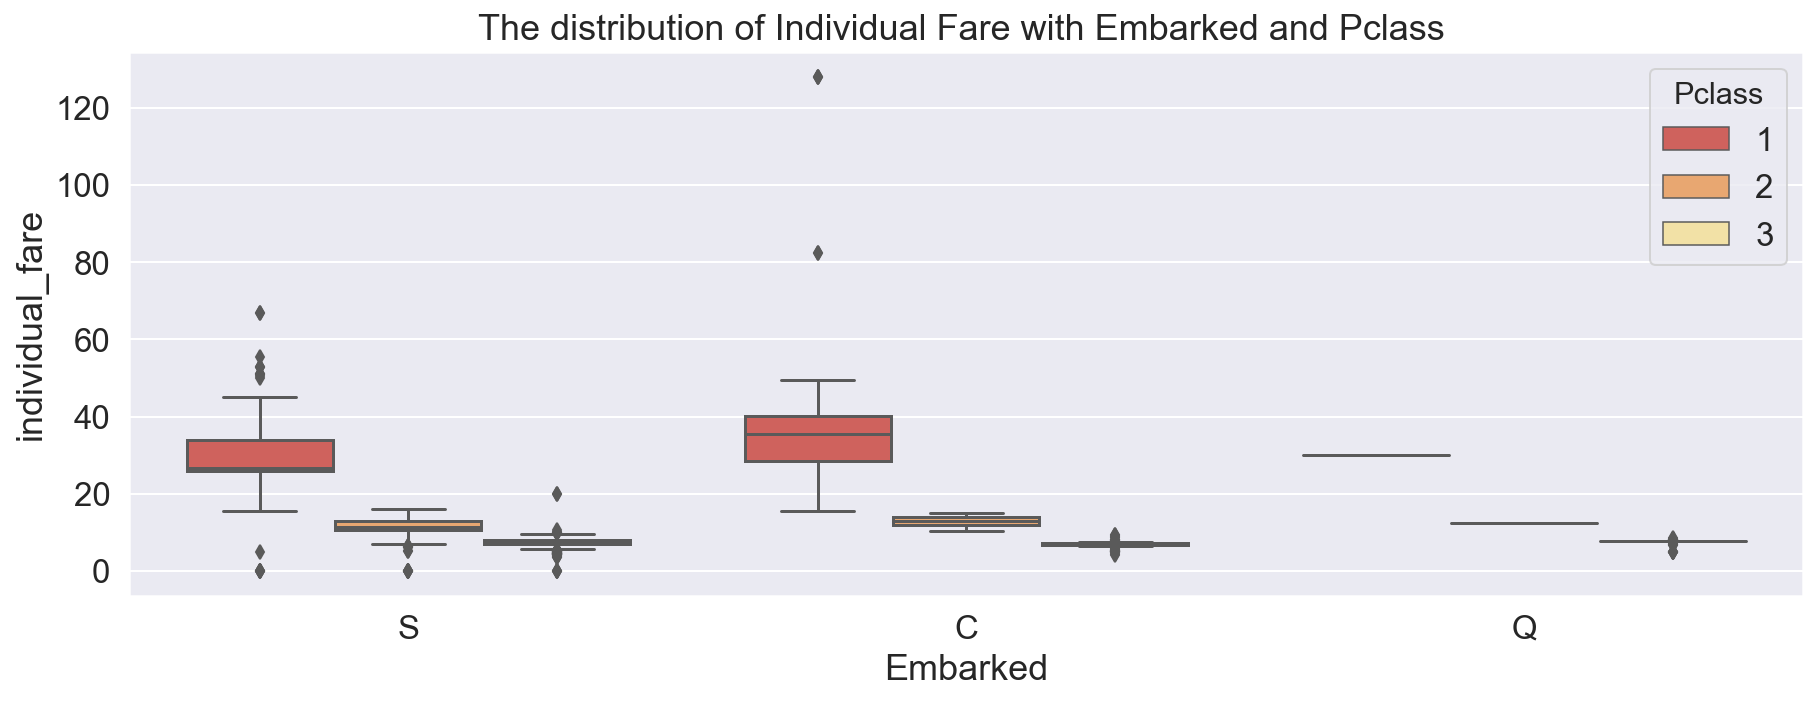

In [69]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,5))
ax1 = sns.boxplot(x="Embarked", y="individual_fare", hue="Pclass", data=visual_df, palette = color_sns);
ax1.set_title("The distribution of Individual Fare with Embarked and Pclass ", fontsize = 18)

Text(0.5, 1.0, 'The distribution of Fare with Embarked and Pclass')

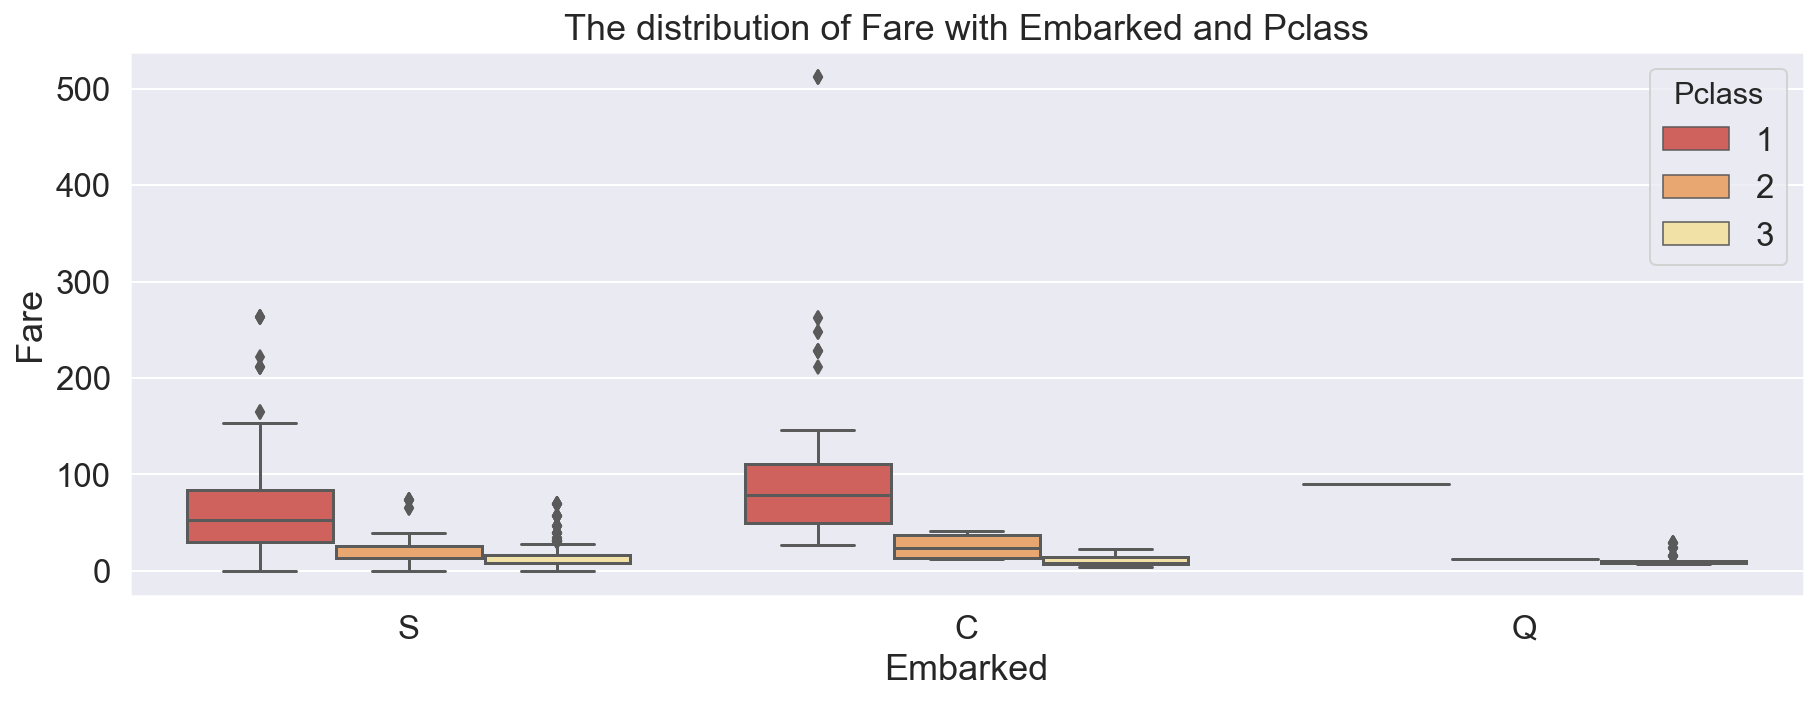

In [70]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,5))
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=visual_df, palette = color_sns);
ax1.set_title("The distribution of Fare with Embarked and Pclass", fontsize = 18)

Text(0.5, 1.0, 'The distribution of Sex')

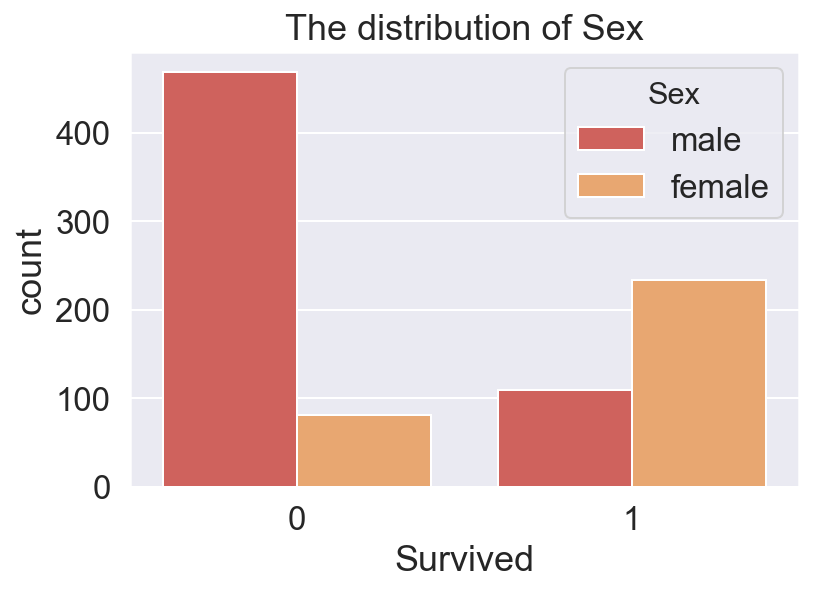

In [71]:
ax=sns.countplot(data = visual_df , x = 'Survived' , hue = 'Sex', orient= 'v', palette= color_sns);
ax.set_title("The distribution of Sex", fontsize = 18)

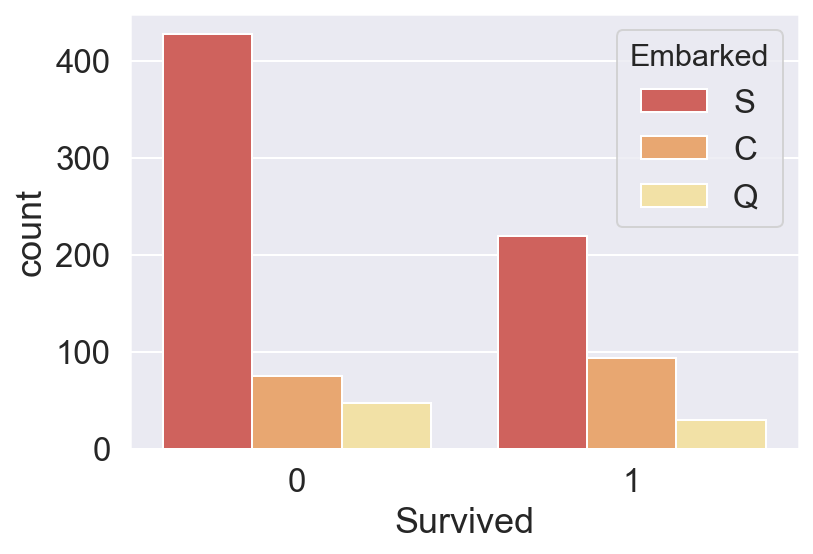

In [72]:
sns.countplot(data = visual_df , x = 'Survived' , hue = 'Embarked', orient= 'v', palette=color_sns);

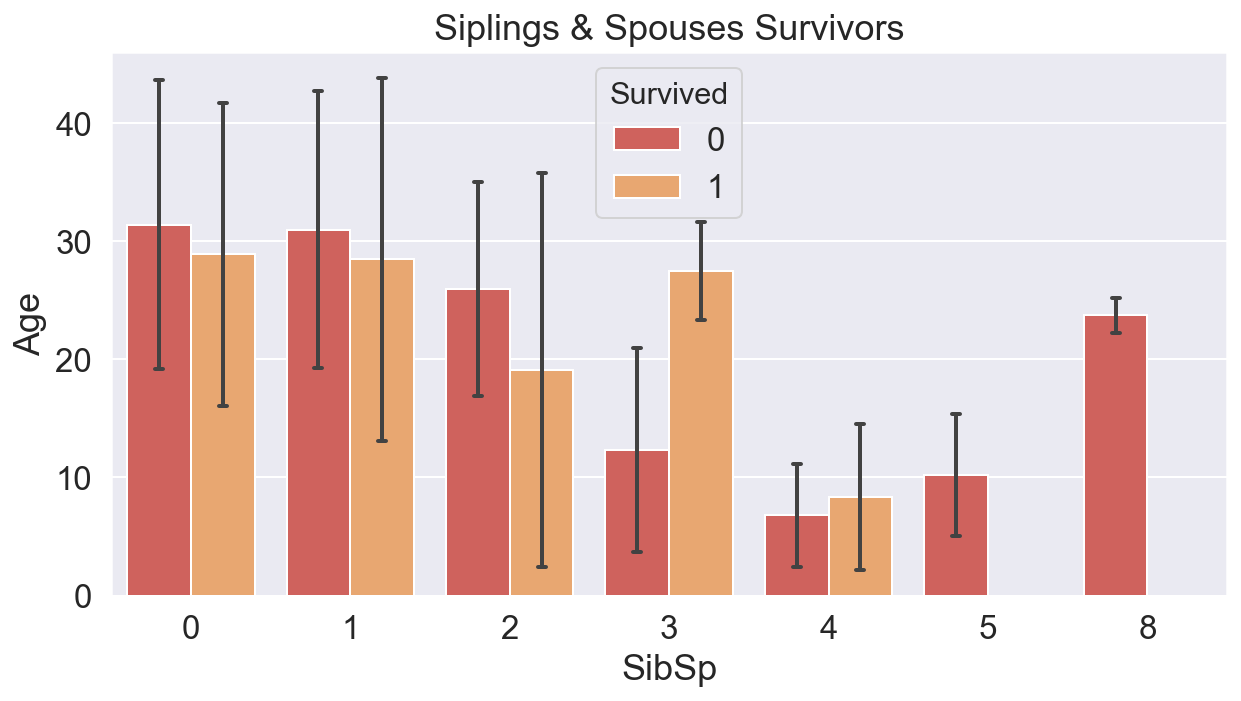

In [73]:
plt.figure(figsize=(10,5))
no_test= df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :]
plt.title('Siplings & Spouses Survivors')

sns.barplot(x = 'SibSp', y= 'Age', data = no_test, hue='Survived',
            palette = color_sns,
            capsize = 0.05,                          
             errwidth = 2,  
            ci = 'sd'   
            )

plt.show()

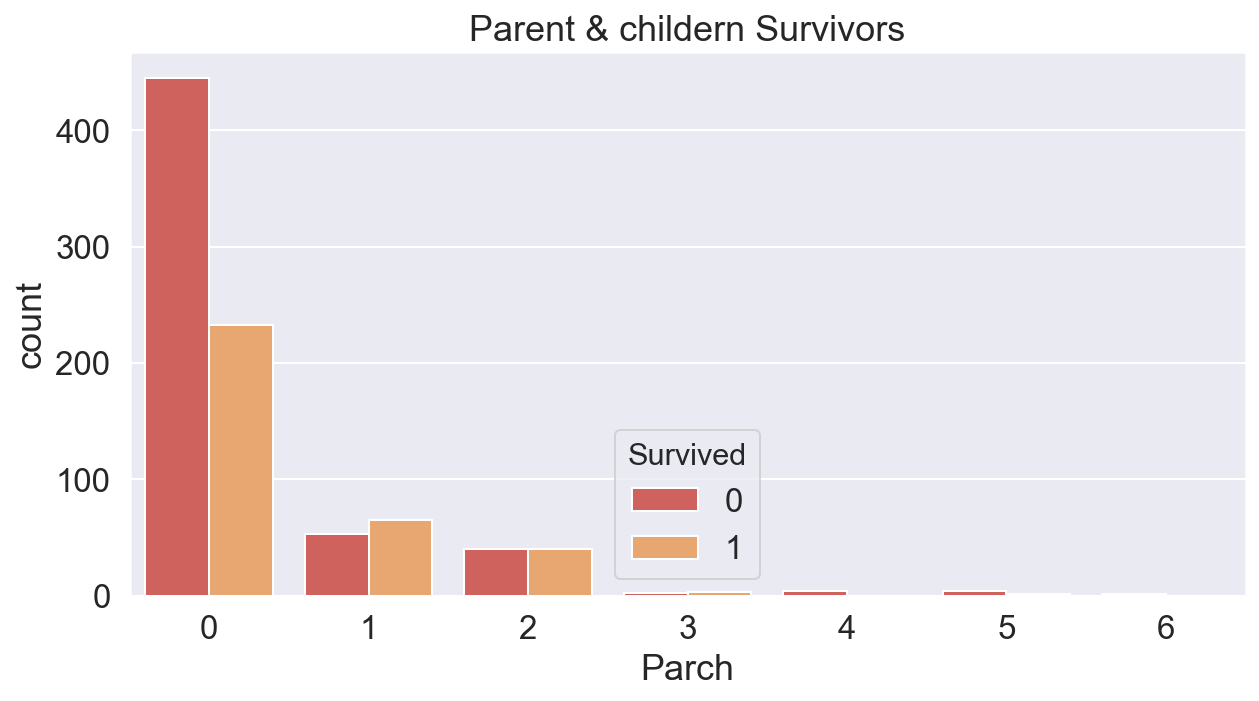

In [74]:
plt.figure(figsize=(10,5))
no_test= df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :]
sns.countplot(x = 'Parch', data = no_test, hue='Survived', palette = color_sns)
plt.title('Parent & childern Survivors')
plt.show()

## Changing some of the data types

In [75]:
# Mapping titles to numbers that are ranked by the survivel rates
title_map={'Mr': 0, 'Other':1, 'Master':2, 'Miss':3, 'Mrs':4, 'Royal':5}
#df['title'] = df['title'] .replace(title_map)
df['title'].value_counts()

Mr          757
Miss/Mrs    462
Master       61
Other        29
Name: title, dtype: int64

## Changing Some Column types to get better results

In [76]:
#map each Embarked value to a numerical value
embarked_map = {'S': 1, 'Q': 2, 'C': 3}
#df['Embarked'] = df['Embarked'].map(embarked_map)

pclass_map ={ 1:'1', 2:'2' , 3:'3'}
df['Pclass'] = df['Pclass'].map(pclass_map)

df['Sex']= df['Sex'].replace({'male':0 , 'female':1})


df['Age']=pd.cut(df['Age'],bins=[0,2,17,35, 65, 99],labels=['Baby','Child','YoungerAdult','Adult','Elderly'])
df['Age']= df['Age'].replace({'Baby':0 , 'Child':1, 'YoungerAdult':2, 'Adult':3, 'Elderly':4})


#df['Deck'] = df['Deck'].replace ({'M':0 , 'FG':1, 'DE':2, 'ABC':3})

df['Fare'] = pd.qcut(df['Fare'], 13)
df['Fare'] = LabelEncoder().fit_transform(df['Fare'])

df['individual_fare'] = pd.qcut(df['individual_fare'], 13)
df['individual_fare'] = LabelEncoder().fit_transform(df['individual_fare'])

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df['family_size'] = df['family_size'].map(family_map)

## Preprocessing and Modeling

In [77]:
df = df.drop(['Name', 'Ticket', 'family_name', 'SibSp', 'Parch', 'individual_fare', 'Pclass', 'is_mother', 'survival_rate','Embarked', 'is_alone'] , axis = 1)

In [78]:
#df['Fare'] = boxcox(df['Fare'], 0.15)

In [79]:
df.shape

(1309, 10)

In [80]:
# changing all Categorical columns to dummies (0,1)
df = pd.get_dummies(df, columns = df.select_dtypes('object').columns, drop_first = True)
df.shape

(1309, 16)

In [81]:
# split data from from test_first_id to the end to be in the test
test_df = df.iloc[df[df['PassengerId'] == test_first_id].index[0]:, :]
test_df.head()

,PassengerId,Survived,Sex,Age,Fare,marrid_female,group_size_by_ticket,family_size_Large,family_size_Medium,family_size_Small,title_Miss/Mrs,title_Mr,title_Other,Deck_DE,Deck_FG,Deck_M
891,892,44,0,2,2,0,1,0,0,0,0,1,0,0,0,1
892,893,44,1,3,0,1,1,0,0,1,1,0,0,0,0,1
893,894,44,0,3,4,0,1,0,0,0,0,1,0,0,0,1
894,895,44,0,2,4,0,1,0,0,0,0,1,0,0,0,1
895,896,44,1,2,5,1,2,0,0,1,1,0,0,0,0,1


In [82]:
# deleting the test dataset from the main df
df = df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :]
df.tail()

,PassengerId,Survived,Sex,Age,Fare,marrid_female,group_size_by_ticket,family_size_Large,family_size_Medium,family_size_Small,title_Miss/Mrs,title_Mr,title_Other,Deck_DE,Deck_FG,Deck_M
886,887,0,0,2,5,0,1,0,0,0,0,0,1,0,0,1
887,888,1,1,2,9,0,1,0,0,0,1,0,0,0,0,0
888,889,0,1,2,8,0,4,0,0,1,1,0,0,0,0,1
889,890,1,0,2,9,0,1,0,0,0,0,1,0,0,0,0
890,891,0,0,2,1,0,1,0,0,0,0,1,0,0,0,1


In [83]:
df = df.drop('PassengerId', axis = 1)
test_df = test_df.drop(['PassengerId','Survived'] , axis = 1)
test_df.head()

,Sex,Age,Fare,marrid_female,group_size_by_ticket,family_size_Large,family_size_Medium,family_size_Small,title_Miss/Mrs,title_Mr,title_Other,Deck_DE,Deck_FG,Deck_M
891,0,2,2,0,1,0,0,0,0,1,0,0,0,1
892,1,3,0,1,1,0,0,1,1,0,0,0,0,1
893,0,3,4,0,1,0,0,0,0,1,0,0,0,1
894,0,2,4,0,1,0,0,0,0,1,0,0,0,1
895,1,2,5,1,2,0,0,1,1,0,0,0,0,1


In [84]:
test_df.shape

(418, 14)

## Kaggle Submission File

In [85]:
# a function that gets the predictions and saves them into a csv file with the correct format
def submission_file (test_pred):
    #for_id = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv') >>> in kaggle

    for_id = pd.read_csv('../datasets/test.csv') # >>> in Jupyter
    my_submission = pd.DataFrame({'PassengerId':for_id.PassengerId, 'Survived':test_pred.reshape(418)})
    my_submission.to_csv('submission.csv', index = False) # dropping the index column before saving it

## Applying Machine learning models for predictions

In [86]:
BOLD = '\033[1m'
END = '\033[0m'
kfold=5

In [87]:
y = df['Survived']
X = df.drop('Survived', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, shuffle = True, random_state=42)

In [88]:
print('baseline accuracy' )
y.value_counts()/len(y)

baseline accuracy


0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [89]:
def model_metrics(model, kfold, X_train, X_test, y_train, y_test, test_df):
    
    model.fit(X_train, y_train)

    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    # CODE HERE PLEASE
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    
    test_pred = model.predict(test_df)
    return test_pred

In [90]:
def basic_classifiers (X_train, X_test, y_train, y_test, test_df):
    kfold = 5
    # Scaling 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    ######################################################################################################  K Neighbors Classifier model
    
    print(); print(BOLD + 'K Neighbors Classifier Model:' + END)
    knn = KNeighborsClassifier()
    knn_pred = model_metrics(knn, kfold, X_train, X_test, y_train, y_test, test_df)
    #submission_file (test_pred)
    
    ###################################################################################################### Logistic Regression
    
    print(); print(BOLD + 'Logistic Regression Model:' + END)
    logistic_regression = LogisticRegression()
    lg_pred = model_metrics(logistic_regression, kfold, X_train, X_test, y_train, y_test, test_df)
    #submission_file (lg_pred)
    
    ###################################################################################################### Decision Tree
    
    print(); print(BOLD + 'Decision Tree Classifier Model:' + END)
    decision_tree = DecisionTreeClassifier()
    dt_pred = model_metrics(decision_tree, kfold, X_train, X_test, y_train, y_test, test_df)
    #submission_file (dt_pred)
    
    ###################################################################################################### Random Forest Classifier
    print(); print(BOLD + 'Random Forest Classifier Model:' + END)
    random_forest = RandomForestClassifier()

    rf_pred = model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test, test_df)
    #submission_file (rf_pred)
    
    ###################################################################################################### Extra Trees Classifier
    print(); print(BOLD + 'Extra Trees Classifier Model:' + END)
    extra_trees = ExtraTreesClassifier()

    et_pred = model_metrics(extra_trees, kfold, X_train, X_test, y_train, y_test, test_df)
    #submission_file (et_pred)
    
    ###################################################################################################### AdaBoost Classifier
    print(); print(BOLD + 'AdaBoost Classifier Model:' + END)
    ada_boost = AdaBoostClassifier()

    ab_pred = model_metrics(ada_boost, kfold, X_train, X_test, y_train, y_test, test_df)
    submission_file (ab_pred)
    
    ###################################################################################################### SVC Classifier
    print(); print(BOLD + 'SVC Classifier Model:' + END)
    svc = SVC()

    svc_pred = model_metrics(svc, kfold, X_train, X_test, y_train, y_test, test_df)
    #submission_file (svc_pred)
    
    

In [91]:
basic_classifiers( X_train, X_test, y_train, y_test, test_df)


K Neighbors Classifier Model:
CV scores:  [0.83850932 0.82608696 0.76875    0.825      0.78616352]
CV Standard Deviation:  0.026684388792551656

CV Mean score:  0.8089019590609009
Train score:    0.8414481897627965
Test score:     0.7555555555555555

Confusion Matrix: 
[[48  7]
 [15 20]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        55
           1       0.74      0.57      0.65        35

    accuracy                           0.76        90
   macro avg       0.75      0.72      0.73        90
weighted avg       0.75      0.76      0.75        90


Logistic Regression Model:
CV scores:  [0.83229814 0.86956522 0.78125    0.8125     0.83018868]
CV Standard Deviation:  0.028762571653002535

CV Mean score:  0.82516040665651
Train score:    0.8414481897627965
Test score:     0.7888888888888889

Confusion Matrix: 
[[45 10]
 [ 9 26]]
Classification Report:  
              precision    recall  f1-score   su

In [92]:
def RandomForest_GridSearch(X_train, X_test, y_train, y_test, test_df):
    print(); print(BOLD + 'Grid Search with Random Forest Classifier Model:' + END)
    kfold=5
    rf_params = {
        #'n_estimators': [10, 50, 100, 150, 200, 250],
        'max_features':[2, 3, 5, 7, 8],
        #'max_depth': [1, 2, 3, 4, 5, 8],
        #'criterion':['gini', 'entropy'],
    }

    random_forest = RandomForestClassifier(n_estimators=100)
    gs = GridSearchCV(random_forest, param_grid=rf_params, cv=5, verbose = 1)
    gs_pred = model_metrics(gs, kfold, X_train, X_test, y_train, y_test, test_df)
    submission_file (gs_pred)
    return gs.best_estimator_

In [93]:
rf_gs_best_estimator = RandomForest_GridSearch(X_train, X_test, y_train, y_test, test_df)


Grid Search with Random Forest Classifier Model:
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.7s finished


CV scores:  [0.82608696 0.80745342 0.8125     0.85       0.83018868]
CV Standard Deviation:  0.014946132328504719

CV Mean score:  0.8252458103832181
Train score:    0.9038701622971286
Test score:     0.7333333333333333

Confusion Matrix: 
[[43 12]
 [12 23]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        55
           1       0.66      0.66      0.66        35

    accuracy                           0.73        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.73      0.73      0.73        90



In [94]:
def ExtraTrees_GridSearch(X_train, X_test, y_train, y_test, test_df):
    print(); print(BOLD + 'Grid Search with Extra Trees Model:' + END)
    # Scaling 
    
    
    kfold=5
    rf_params = {
        #'n_estimators': [10, 100, 400, 800, 1100, 1850],
        #'max_features':['auto'],
        'max_depth': [1, 2, 3, 4, 5, 8],
        #'criterion':['gini'],
    }

    extra_trees = ExtraTreesClassifier(n_estimators=100)    
    gs = GridSearchCV(extra_trees, param_grid=rf_params, cv=5, verbose = 1)
    gs_pred = model_metrics(gs, kfold, X_train, X_test, y_train, y_test, test_df)
    
    submission_file (gs_pred)
    return gs.best_estimator_

In [95]:
et_gs_best_estimator = ExtraTrees_GridSearch(X_train, X_test, y_train, y_test, test_df)


Grid Search with Extra Trees Model:
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
CV scores:  [0.83229814 0.86956522 0.7875     0.83125    0.82389937]
CV Standard Deviation:  0.02611396559492541

CV Mean score:  0.8289025450212899
Train score:    0.867665418227216
Test score:     0.7888888888888889

Confusion Matrix: 
[[47  8]
 [11 24]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        55
           1       0.75      0.69      0.72        35

    accuracy                           0.79        90
   macro avg       0.78      0.77      0.77        90
weighted avg       0.79      0.79      0.79        90



[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.9s finished


In [96]:
# second best model 
et_gs_best_estimator

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=8, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [97]:
def Best_Score_model (X_train, X_test, y_train, y_test, test_df):
    print(); print(BOLD + 'Best Score Model (RandomForestClassifier):' + END)
    opt_model = RandomForestClassifier(criterion='gini',n_estimators=1850,
                                        max_depth=7,min_samples_split=6,
                                        min_samples_leaf=6, max_features='auto',
                                        oob_score=True, random_state=42,
                                        n_jobs=-1, verbose=1)
                                 

    opt_pred = model_metrics(opt_model, kfold, X_train, X_test, y_train, y_test, test_df)
    submission_file (opt_pred)

In [98]:
Best_Score_model (X_train, X_test, y_train, y_test, test_df)


Best Score Model (RandomForestClassifier):


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1850 out of 1850 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1850 out of 1850 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1

CV scores:  [0.83229814 0.8757764  0.78125    0.81875    0.82389937]
CV Standard Deviation:  0.03025265164037072

CV Mean score:  0.8263947810461346


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1850 out of 1850 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s


Train score:    0.8401997503121099


[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1850 out of 1850 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s


Test score:     0.8111111111111111


[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1850 out of 1850 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s



Confusion Matrix: 
[[48  7]
 [10 25]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        55
           1       0.78      0.71      0.75        35

    accuracy                           0.81        90
   macro avg       0.80      0.79      0.80        90
weighted avg       0.81      0.81      0.81        90



[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1850 out of 1850 | elapsed:    0.4s finished


## Evaluation and Conceptual Understanding

After evaluating all of the applied models, and the feature engineering methods,  we concluded that it is very hard to get a score higher than 0.79 in Kaggle. The best model that achieved the accuracy of 0.79904 was  RandomForest classifier with a grid search. The Extra tree with grid search achieved a similar result with an accuracy of 0.794. Other models like KNN and logistic regression did not perform well. Decision tree and random forest alone had overfitting as the train scores were too hight compared to the test. The below scores were for the best performing model (Random Forest Classifier)

CV scores:  [0.83229814 0.86956522 0.7875     0.8375     0.82389937]
CV Standard Deviation:  0.026344977444281922

CV Mean score:  0.83015254502129
Train score:    0.8439450686641697
Test score:     0.7888888888888889

Confusion Matrix: 

[[47  8]

 [11 24]]
 
Classification Report:  
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        55
           1       0.75      0.69      0.72        35

    accuracy                           0.79        90
   macro avg       0.78      0.77      0.77        90
weighted avg       0.79      0.79      0.79        90


## Conclusion and Recommendations

As a second project in our Data Science Immersive Course with General Assembly and MiSK Academy, we were asked to finish this "Titanic Survival" Competition in Kaggle, We used multiple data cleaning methods, employed (EDA) methods to visualize the Data provided, in order to know the data well. Finally, we applied multiple machine learning methods in order to predict the the passengers survival in the test data set. The Classification models used were KNN, Decision Tree, Random Forest and a few more models. The best score we achieved in Kaggle competition, using a Random Forest Classifier with Accuracy = 0.79904. we, and were ranked as the 1769th out of 17,693 teams.

### Thank you very much,

#### Raghad, Fatmah, Hessah